<a href="https://colab.research.google.com/github/Idris-worldwide/Analysis-of-Yelp-reviews/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science for Business Applications
> "Exam Project: Features for Creating a Successful Business - An Analysis on Yelp Reviews"

- toc:true
- branch: master
- badges: true
- comments: true
- author: "authors: 119183, 132492 & 143192"
- categories: [fastpages, jupyter]

---
#Introduction to the Data
---

In this project, we have chosen to work with an open dataset provided by Yelp (you can download and read more about the data set [here](https://www.yelp.com/dataset)).

Yelp is an online review platform that enables people to find user recommendations of a wide range of businesses - and write reviews of their own experiences. To give a review as user is asked to give a star rating on a scale from 1 to 5 and include a description of the experience the user had with the entity.

This dataset was made available for use in personal, educational and academic purposes. It is a subset consisting of reviews, businesses and users across 10 metropolitan areas. More specifically, it contains data on more than 8 million reviews, two-hundred-thousand businesses, and almost 2 million users. The dataset is downloaded as a  compressed tar-file format. Uncompressed there are 5 json-files and  a total of 9.8GB data - a rather huge dataset.

On a Data Science stand point this dataset is rather interesting as it contains a vast amount of data, including structured and unstructured data (text). For the more demanding project, Yelp has made an additional dataset available containing 200.000 photos that has been posted on their platform in connection with the reviews. These photos however, are not included in this project.

##Problem Statement
After a thorough inspection of the documentation, we decided to use three main data sets: *Business.json*, *review.json* and *user.json*. Thus, check-ins and tips (shorter reviews) has been excluded from the analysis.

We found these datasets to be interesting for our project as they contain text reviews and additional related data about the users that has writes the reviews and the businesses that reviewed. This allows us to extract features of the data to gain important and actionable insights about the businesses and the markets they operate in.

Inspired by House of Cards ([How Netflix Used Data Science to Create One of the Most Loved Shows Ever: House of Cards](https://www.jigsawacademy.com/how-netflix-used-data-science-to-create-one-of-the-most-loved-shows-ever-house-of-cards/)) we came up with an interesting subject for analysis - our problem statement:

###Question for Analysis

> **What are the features that seperates the best and worst performing businesses - and how can we use these insights to create a successful new business concept?**

##Description of the Datasets

> A description of the dataset is listed in the [documentation](https://www.yelp.com/dataset/documentation).

Here, we provide you with a simplified description of the datasets:

**Business.json** 

Contains bussiness data including location data, attributes and categories:

* business_id: ID of the business
* name: name of the business
* address: address of the business
* city: city of the business
* state: state of the business
* postal_code: postal code of the business
* latitude: latitude of the business
* longitude: longitude of the business
* stars: average rating of the business
* review_count: number of reviews received
* is_open: 1 if the business is open, 0 if the business has closed down
* attributes: 
* categories: multiple categories of the business
* hours: business opening hours
 
**Review.json**

Contains full review text data including the user_id that wrote the review and the business_id the review was written for:
* review_id: ID of the review
* user_id: ID of the user
* business_id: ID of the business
* stars: stars given in review
* date: time of review
* text: the review
* useful: number of people that found the review useful 
* funny: number of people that found the review funny
* cool: number of people that found the review cool

**User.json**

Contains user data including the user's friend mapping and all the metadata associated with the user.
* user_id: ID of the review
* name: name of the user
* review_count: number of reviews given
* yelping_since: user creation date
* friends: the user’s friends as an array of user_ids
* useful: number of useful vores sent by the user
* funny: number of funny vores sent by the user
* cool: number of cool vores sent by the user
* fans: number of fans the user has
* elite: years the user had elite status as an array.
* average_stars: average star rating given by the user
* compliments: number of times the user was complimented.

##Methodology

###Steps of Analysis

To anwer the question of interest, we will perform an **exploratory data analysis** (EDA) to gain an understanding of the business context and which factors that has proven a business successful or not. Here, we will investigate what business categories that the users are mostly interested in and where the demand is located. Furthermore, we explore which businesses that has been successful in attracting customers to their business and how well they succeed in satisfying the consumers' needs. Finally, for the data exploration, we investigate the correlation between customer satisfaction and whether the business is still in business or not.

From the EDA a few businesses of interest will be further investigated by applying **Topic Modeling** to understand what features in the reviews that set the best performing businesses apart from the lowest performing businesses. These insights can help future businesses to design a better business model and to know what the customers' main success criteria and complaints are.

Moreover, we will apply a **supervised machine learning** model on top of the topic modeling to enable businesses to predict the outcome of different narratives. This will enable businesses to delve deeper into their business design and make decision on what features they should include in order to provide the best possible customer experience. I other words, this model enables business to design their business on the narratives they would like the customers to experience - a very powerful tool.

###Preprocessing Steps

To prepare our data for analysis we will start by delimitting the data to represent a business category and location of interest. We do this as we assume that customer demand may wary across different locations and categories.

Moving on, we will look at the users and identify those that tend to be too negative or positive in their reviews. This is an important step, as some users might be “notorious complainers” and thus might skew the results.

Similarly, the number of reviews assigned to a business is an important aspect to consider - the less amount of data the less representative. These businesses will therefore present unreliable results. In order to avoid this problem, we will filter out businesses that fail to exceed a number of reviews assigned to them.

**Limitation:**
 
We only read in 1,000,000 lines of data from the *review.json* as well as from the *user.json*. Those 2 data sets were rather large, and our computers lacked the necessary memory to work with them. What this means is that we “lost” some information, however we thought that this would not interfere with our ability to demonstrate our proficiency of the newly acquired methods and tools. (Data preprocessing, EDA, Topic Modeling, SML, etc.) Eventually, our “final” data set (*phoenix_nightlife.csv*) reached a size of 1 GB, thus we had plenty of data to work with.

---
#Data exploration, narrowing scope of analysis and preprocessing
---

###Installation & Libraries

As usual, before we can initialize the data exploration steps, we will need a repository of libraries to work with the data. 

We have provided you with interactive buttons throughout this page, that you can use to display or hide certain code cells of your interest. As such, we have provided you with a list of the installations and libraries below.

We wish you happy reading!

In [ ]:
#collapse-hide

#Installations
!pip install wordcloud

#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
from sklearn import metrics
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.utils as utils
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, make_pipeline
import joblib as joblib

from google.colab import files #Use to upload single files from local directory
from google.colab import drive #Use to mount google drive to access documents saved in the cloud

> Note: Not all code cells are displayed in this page. For the full notebook, please refer to the GitHub, Binder or Colab as listed in the top of this page.

##Delimiting the datasets

To efficiently work with the data, we have created a google drive folder and mounted it to Colab. We have filled the drive with all the relevant json-files and will also be used to host future data sets that are created throughout this project. You can view the Drive [here](https://drive.google.com/drive/folders/1anYSKGV52MSNZStJ9o2N66gJTJxfLtOd?fbclid=IwAR3wZ3Dk-StfGSAN4qPKNViFFnNJH4EfjADX1vqDSIuSprPEREn5lve4Xn0).



In [ ]:
#hide
drive.mount('/content/drive') #Mounts Google Drive that holds the data.

In this section we will delimit the geographic area of research to a specific business category and area of interest. This allows us to dig deeper into the data and compare businesses that operate within the same space.

We will start by identifying which business categories that are the most popular. Later, we will look at the businesses' locations to identify which location is the most interesting for a new business to enter. Here, popularity is defined as the number of businesses that are working within the same category, while the most interesting locations are defined as those with the highest demand compared to the current supply (the locations with the lowest market saturation). It is assumed that the barrier of entry for any given business is lowest when the market saturation is similarly low. Thus, this provides a great indicator of where to invest in a new business.

###Delimit by Business Category
Let's start by looking at the business.json data:

In [ ]:
#hide_input
business_json_path = '/content/drive/MyDrive/DSBA_Project/yelp_dataset/yelp_academic_dataset_business.json'

business = pd.read_json(business_json_path, lines=True)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


From the data we see that the each business are assigned to multiple categories. For instance, Felinus is working within three different categories: 'pets, pet services and pet groomers'.

To identify the most popular category, each business is split into multiple rows, each containing just one single category. Thus, Felinus will be split into 3 rows. Finally, each category is counted to display the ones that are appearing most often within the business data:

It is important to note that some businesses have closed down and are no longer in operation. We might not want to include these when trying to find the most popular business categories.



In [ ]:
#hide
drop_columns = ['address', 'latitude', 'longitude', 'hours']
business = business.drop(drop_columns, axis= 1)

> Note: adress, latitude, longitude and hours has been excluded from the data.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


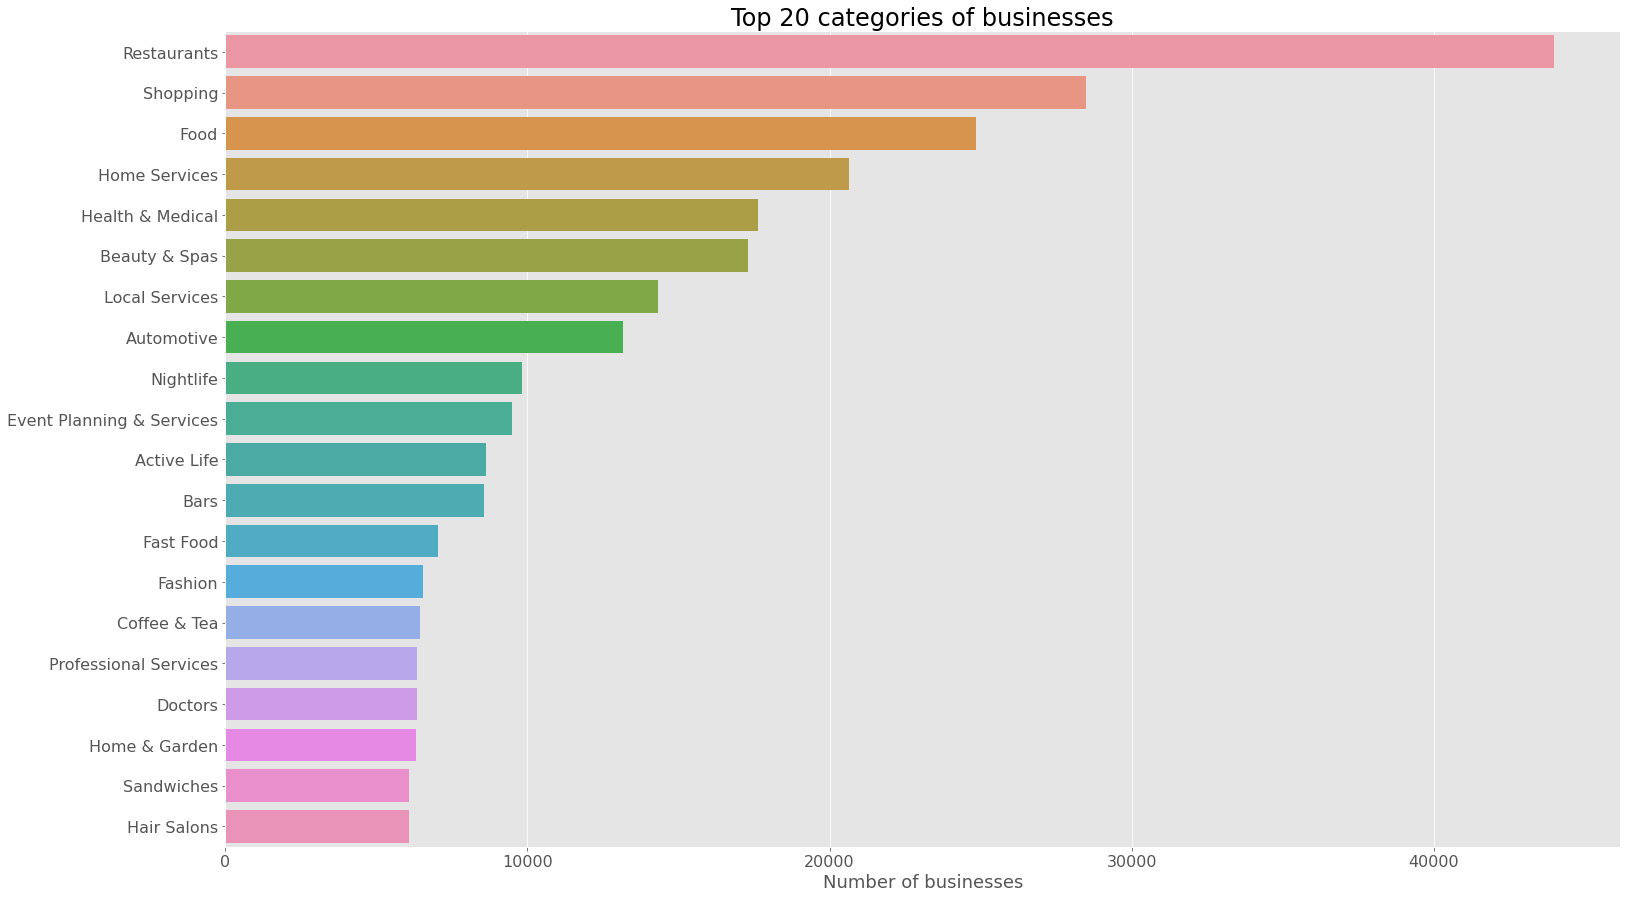

In [ ]:
#collapse-hide
business_open = business[business.is_open == 1] #Filter out business that has closed
business_explode = business_open.assign(categories = business_open.categories.str.split(', ')).explode('categories') #Split categories into multiple rows
business_popular_cat = business_explode.categories.value_counts() #Count number of times a category appears in the data
business_popular_cat = pd.DataFrame(business_popular_cat)

#Visualization of the 20 most popular business categories
plt.figure(figsize= (25, 15))
plt.style.use('ggplot')
sns.barplot(business_popular_cat.categories[:20], business_popular_cat.index[:20])
plt.title('Top 20 categories of businesses', fontdict= {'fontsize': 24})
plt.xlabel('Number of businesses', fontdict= {'fontsize': 18})
plt.tick_params(labelsize= 16)
plt.savefig('categories_top_20.png')

####Chosen Category of Interest

As seen by the barplot, more than 40.000 restaurants are listed on Yelp's platform, making restaurants by far the most popular business category. This could be a clear indication of a business category with fierce competition but could also prove a great place of analysis, as this business segment might need a thorough understanding of the customers' needs in order to successfully position itself in the market, more than any other business.

Even so, we delimit our analysis to the 9th most commonly listed category on Yelp: the Nightlife category. We found this category particularly interesting to analyse, as we believe nightlife is a very complex business area where the lines that defines a successful business are quite blurred and washed out. Our hopes are that we through our analysis can gain a better understanding of which features that are important for customers to give them a great experience and help new businesses in creating successful business concepts. Moreover, we believe that with almost 10.000 businesses operating in the nightlife landscape, there is great data potential to be covered.

###Delimit by Location



In [ ]:
#hide

#This line of code filters the original business.json dataset to only include businesses that are working in the nightlife category.
business_nightlife = business[business['categories'].str.contains('Nightlife', case= False, na= False)]

In this step, we are going to look at where the businesses are located and which location has the highest concentration of businesses relative the demand of the consumers.

To do this, we are going to work with data from business.json and data from review.json.

To work with the review data, we will follow a method provided by [towardsdatascience](https://towardsdatascience.com/converting-yelp-dataset-to-csv-using-pandas-2a4c8f03bd88), in which we iterate through the data in smaller chunks of 1.000.000 rows. This results in lower memory usage, reduces the time to load and allows us to check results faster. Moreover, this is a necessary step as the computation exceeds our systems' capable memory by far, and returns an error. Simultaniously, the review data is merged (inner) with our chosen business category - nightlife businesses. Finally, the different dataframe 'pieces', are glued together into one data frame. 

> Important: The following code cannot be executed in Google Colab. A local client must be used.

In [ ]:
#collapse-hide

reviews_json_path = 'D:/projects/NLP project DS/yelp_academic_dataset_review.json'
size = 1000000 #Defines the number of rows that will be loaded from the dataset 

review = pd.read_json(reviews_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str, 'business_id':str,'stars':int, 'date':str,'text':str,'useful':int, 'funny':int,'cool':int},
                      chunksize=size)

#Create a random sample
chunk_list = []
for chunk_review in review:
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis= 1)
    chunk_review = chunk_review.rename(columns= {'stars': 'review_stars'})

    #Merge reviews with the chosen business category
    chunk_merged = pd.merge(business_nightlife, chunk_review, on= 'business_id', how= 'inner')

    #Print the number of times nightlife category showed up in the chunk
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)

    #The pandas chunk method creates a JsonReader object for iteration.
    ##Concatenate all relevant data back to one dataframe
    business_nightlife_review = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

273589 out of 1,000,000 related reviews
276014 out of 1,000,000 related reviews
264422 out of 1,000,000 related reviews
272956 out of 1,000,000 related reviews
261842 out of 1,000,000 related reviews
259562 out of 1,000,000 related reviews
260244 out of 1,000,000 related reviews
256680 out of 1,000,000 related reviews
4378 out of 1,000,000 related reviews


Lets have a look at the merged dataframe we created:

In [ ]:
#hide_input
business_nightlife_review.head()

,business_id,name,city,state,postal_code,stars,review_count,is_open,attributes,categories,user_id,review_stars,text,date
0,DCsS3SgVFO56F6wRO_ewgA,Missy Donuts & Coffee,Mesa,AZ,85201,2.5,7,0,"{'BikeParking': 'True', 'BusinessParking': '{'...","Donuts, Juice Bars & Smoothies, Food, Coffee &...",cSQnJ7JTY78ki5ai57kZ9A,4,9.99 for a dozen raised is a Lil much the cake...,2015-08-07 15:02:50
1,DCsS3SgVFO56F6wRO_ewgA,Missy Donuts & Coffee,Mesa,AZ,85201,2.5,7,0,"{'BikeParking': 'True', 'BusinessParking': '{'...","Donuts, Juice Bars & Smoothies, Food, Coffee &...",5_CoaRC22jwmuUzZwlRG_g,1,Dirty dinning list will not go here again sad ...,2016-02-13 17:50:23
2,DCsS3SgVFO56F6wRO_ewgA,Missy Donuts & Coffee,Mesa,AZ,85201,2.5,7,0,"{'BikeParking': 'True', 'BusinessParking': '{'...","Donuts, Juice Bars & Smoothies, Food, Coffee &...",5_CoaRC22jwmuUzZwlRG_g,5,Just went here for a late night donut fix lol....,2015-09-29 06:18:47
3,DCsS3SgVFO56F6wRO_ewgA,Missy Donuts & Coffee,Mesa,AZ,85201,2.5,7,0,"{'BikeParking': 'True', 'BusinessParking': '{'...","Donuts, Juice Bars & Smoothies, Food, Coffee &...",c5ebpS7ex6npffT9Nlvqvw,1,Would of given 0 stars if possible first impre...,2015-11-10 18:55:53
4,DCsS3SgVFO56F6wRO_ewgA,Missy Donuts & Coffee,Mesa,AZ,85201,2.5,7,0,"{'BikeParking': 'True', 'BusinessParking': '{'...","Donuts, Juice Bars & Smoothies, Food, Coffee &...",EXys-sSmm5auoqs6Jkyh7g,5,This is my first Yelp review. We just tried Mi...,2016-01-25 02:26:47


> Note: review_id, useful, funny and cool columns has been excluded from the data. These data do not contribute to the objective of the paper, being to get a notion of the features that are most important for a satisfying nightlife experience in order to build a foundation for a new nightlife business concept. 

To briefly summarize our new merged dataframe, the merging of the "reviews" dataset with our orignial dataset has resulted in addition of columns named "user_id", "review_stars", "text" and "date".  Please also keep in mind that we dropped columns the reviews dataset has been. These data will support our paper on providing insigts into the various users that wrote the reviews and the business_ids that the texts were written for. Most importantly, we will get the opportunity to delve into what words where associated most often with the specific companies of interest and the content of the reviews for the nightlife industry. 

In [ ]:
#hide

#We save the DataFrame to a CSV file for use in the following task
name = 'business_nightlife_review.csv'
business_nightlife_review.to_csv(name, index= False)

####Calculating the Supply, Demand & Market Saturation

Supply: In order to create the supply proxie, we create a tabular table which indicates the highest unique nightlife businesses in the cities within the dataset. It becomes evident that Las Vegas , the city that never sleep, gets the honour of qualifying as the top nightlife business host. On a 2nd place, we have Toronto with only 300 businesses below Las Vegas and Phoenix as a 3rd with half as much as Las Vegas.

Demand: Similar to the supply tabular table, we created a demand proxie which indicates the highest review size (the amount of reviews given by customers) for nightlife businesses in the cities within the dataset. It becomes evident that Las Vegas again takes the 1st place by a significant margin, wheres Phoenix follows as 2nd.

By adding the market saturation to the Supply and Demand Dataframe, we get an indication of what markets are less saturated with the supply over the demand. In other words, which markets have a higher proportion of reviews in terms of their supply, and thus, have a better foundation for businesses taking advantage of this low market saturation ?

In [ ]:
#collapse-hide

#Count the number of businesses present in the cities, sorted by largest number to smallest
supply = pd.DataFrame(df.groupby('city').name.nunique().sort_values(ascending= False))
supply.columns = ['supply']


#Count number of reviews given in each city as a measure of demand.
demand = pd.DataFrame(df.groupby('city').size().sort_values(ascending= False))
demand.columns = ['demand']

#collpase-show
df_dem_sup = supply.merge(demand, on= 'city')
df_dem_sup['market_saturation'] = df_dem_sup.supply / df_dem_sup.demand * 100

#Filter out the cities with below 5000 reviews and sort the dataframe entries by market saturation (ascending)
df_dem_sup = df_dem_sup[(df_dem_sup.demand > 5000)]
df_dem_sup = df_dem_sup.sort_values(by= 'market_saturation')
df_dem_sup.head(20)

,supply,demand,market_saturation
city,,,
Las Vegas,3080,727107,0.423597
Henderson,328,53926,0.608241
Scottsdale,866,141971,0.609984
Gilbert,208,31056,0.669758
Phoenix,1449,211114,0.686359
Chandler,337,47316,0.712233
Goodyear,67,9083,0.737642
Tempe,418,55787,0.749279
Peoria,137,16001,0.856196


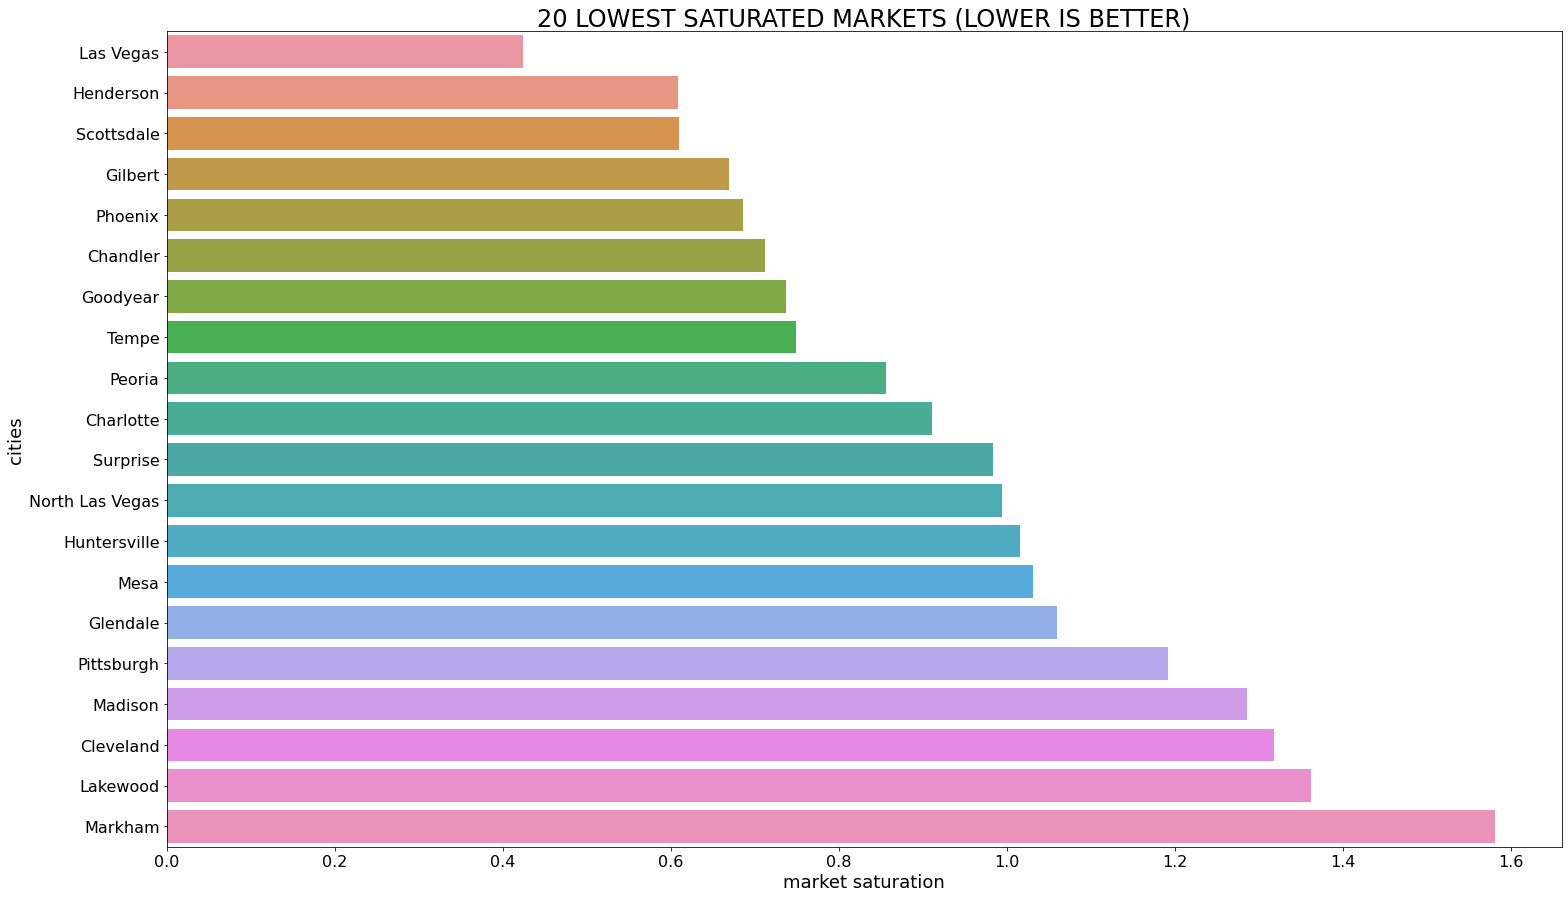

In [ ]:
#Collapse-hide

#Visualization of the 20 lowest saturated markets
plt.figure(figsize= (25, 15))
plt.title('20 LOWEST SATURATED MARKETS (LOWER IS BETTER)', fontdict= {'fontsize': 24})
sns.barplot(df_dem_sup.market_saturation[:20], df_dem_sup.index[:20])
plt.ylabel('cities', fontdict= {'fontsize': 18})
plt.xlabel('market saturation', rotation= 0, fontdict= {'fontsize': 18})
plt.tick_params(labelsize= 16)
plt.savefig('market_saturation.png')

####Chosen City of Interest

From the above table, we can conclude that Las Vegas has the lowest saturated market with highest demand and supply compared to the other markets. It is interesting to see that Phoenix is among the top 5 lowest saturated markets, as they have a relatively high demand and medium supply. As we see an opportunity for a nightlife business to take advantage of this high demand and low saturated market, we are interested in assessing the nightlife of Phoenix. Thus, we want to slice and dice the data down to only including Phoenix businesses and their respective reviews.   

In [ ]:
#hide

#subsetting the dataframe to only Phoenix businesses
phoenix = df[(df.city == 'Phoenix')]
phoenix.head()

,business_id,name,city,state,postal_code,stars,review_count,is_open,attributes,categories,user_id,review_stars,text,date,experience
8,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",3i095Fnh08yC-Q3VY0KeHQ,5,Our new favorite local spot. The owners are fa...,2018-08-30 01:39:54,1
9,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",MeLrLNf-aoz9niUmRMmb9g,5,Stopped in at Irene's after work. This place ...,2018-08-21 00:48:47,1
10,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",E9IJMZ2njmG1LOMmOhzeBg,5,Such a fun atmosphere!! Went there last night ...,2019-01-12 21:25:24,1
11,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",7KZhUr0i3K202Ux1-OGOhQ,4,"This place is new and very close to us, so we ...",2018-07-30 01:57:23,1
12,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",UIKrJGEyTCWKaAvWDhLJug,5,This is exactly what this neighborhood needed....,2018-07-23 02:01:32,1


In [ ]:
#hide
phoenix.shape

(211114, 15)

In [ ]:
#hide
phoenix.isnull().sum()

business_id       0
name              0
city              0
state             0
postal_code       7
stars             0
review_count      0
is_open           0
attributes      106
categories        0
user_id           0
review_stars      0
text              0
date              0
experience        0
dtype: int64

In [ ]:
#hide

#We save the DataFrame to a CSV file for use in the following task.
name = 'data/phoenix_nightlife.csv'
phoenix.to_csv(name, index= False)

###Excluding Biases from Extreme Users


In this section, we aim to further preprocess our newest Phoenix nightlife dataframe. We want to ensure that our data leads to the best possible outcome, thus, the goal with preprocessing the data is to transform our mildly preprocessed raw data into a clean, usable and more meaningful data set. We start by importing the Yelp User dataset and merging it into our current Phoenix nightlife dataframe. In order to make our paper as valid and reliable as possible, we wish to exclude biases in our project by identifying and removing the customers that tend to be purely positive or negative. 

As online ratings are one of the most trusted sources of consumer confidence in commercial decisions, and users can easily influence the reviews written by others, it becomes relevant to consider the characteristics of the user. By the use of a statistical method for removing outliers, we intend to remove users with too little reviews, as they tend to have an extreme opinion when rating, and users with only 1 or 5 average star ratings.

At this point, we want to iterate through the user data and drop irrelevant columns to further limit the size of the data. Additionally, since "review_count" occours in both the business and user data, we rename the review_count-column to "num_reviews_written" to eliminate confusion.

In [ ]:
#hide

#import User JSON in chunks with a data sample of 1.000.000
user_json_path = 'data/yelp_academic_dataset_user.json'
size = 1000000
#Define dataframe and the datatypes of the column variables 
users = pd.read_json(user_json_path, lines= True,
                    dtype= {'user_id': str, 'name': str, 'review_count': int, 'yelping_since': str, 'friends': list, 
                            'useful': int, 'funny': int, 'cool': int, 'fans': int, 'elite': list, 'avarage_stars': float, 
                            'compliment_hot': int, 'comliment_more': int, 'compliment_profile': 42, 'compliment_cute': int,
                            'comliment_list': int, 'compliment_note': int, 'comliment_plain': int, 'compliment_cool': int, 
                            'compliment_funny': int, 'compliment_writer': int, 'compliment_photos': int},
                    chunksize= size)


chunk_list = []

#iterate thorugh users
for chunk_user in users:

    #Drop irrelevant columns
    chunk_user = chunk_user.drop(['name', 'yelping_since', 'funny', 'cool', 'fans', 'elite', 'compliment_hot',
                                'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 
                                'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 
                                'compliment_writer', 'compliment_photos'], axis= 1)
    
    #Rename the review count column
    chunk_user = chunk_user.rename(columns= {'review_count': 'num_reviews_written'})

    #Merge the iteration of Users with Phoenix Nightlife dataset 
    chunk_merged = pd.merge(phoenix, chunk_user, on= 'user_id', how= 'inner')

    #Display the shape of the arrays
    print(f"{chunk_merged.shape[0]} out of {size:,} related users.")
    chunk_list.append(chunk_merged)

    #Concatenate data frame "pieces" into one data frame.
    phoenix_nightlife_user = pd.concat(chunk_list, ignore_index= True, join= 'outer', axis= 0)

180426 out of 1,000,000 related users.
30688 out of 1,000,000 related users.


In [ ]:
#hide
name = 'data/phoenix_users.csv'
phoenix_nightlife_user.to_csv(name, index= False)

This new dataframe holds the relevant information and will be the foundation for the outlier removal:

In [ ]:
#hide_input

phoenix_nightlife_user.head(3)

,business_id,name,city,state,postal_code,stars,review_count,is_open,attributes,categories,user_id,review_stars,text,date,experience,num_reviews_written,useful,friends,average_stars
0,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020.0,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",3i095Fnh08yC-Q3VY0KeHQ,5,Our new favorite local spot. The owners are fa...,2018-08-30 01:39:54,1,5,1,"qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...",4.2
1,ku9ak9cQnIGBCXBtRd61tQ,Spoke & Wheel - Phoenix,Phoenix,AZ,85020.0,4.0,357,1,"{'NoiseLevel': ""u'average'"", 'WiFi': ""u'free'""...","Bars, Beer, Wine & Spirits, Sandwiches, Breakf...",3i095Fnh08yC-Q3VY0KeHQ,5,This is our favorite local spot! The wings are...,2018-08-30 01:37:47,1,5,1,"qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...",4.2
2,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020.0,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",MeLrLNf-aoz9niUmRMmb9g,5,Stopped in at Irene's after work. This place ...,2018-08-21 00:48:47,1,12,4,"p12DAvNJZ5szp8jP69NUbA, JdJ0b9QZKVrjv_nicDhABw...",5.0


>Note: Columns indicating number of reviews by the user, number of useful notes sent by the user, the users friends and the average star-ratings given by the users have been added to the dataframe. 

####User Rating Behaviour before removing Outliers

Before removing the outliers for the users with purely extreme ratings, it is infromative to look at the current distribution of average star ratings by the user and their number of reviews.

In [ ]:
#hide
phoenix_nightlife_user = pd.read_csv('/content/drive/MyDrive/DSBA_Project/yelp_dataset/data_sets/phoenix_users.csv')

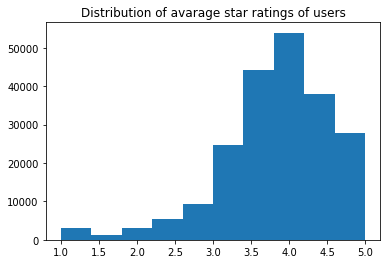

In [ ]:
#Collapse-hide

#Plot a histogram of the given variable
plt.title('Distribution of avarage star ratings of users')
plt.hist(phoenix_nightlife_user.average_stars);

What becomes evident is that we have a more "skewed right" distribution, which indicates that the majority of users that have rated the nightlife businesses in Phoenix tend to be more positively associated. Users tend to give 5 in average rating way more often than 1-2 ratings. We also notice that in average, users tend to rate the nightlife businesses in Phoenix between 3,75-4,25 stars.

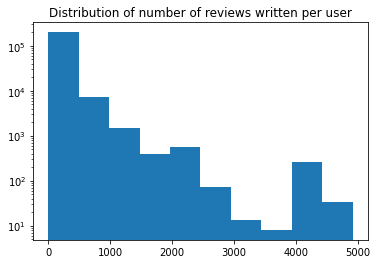

In [ ]:
#Collapse-hide

#Plot a histogram of the given variable
plt.title('Distribution of number of reviews written per user')
plt.yscale('log')
plt.hist(phoenix_nightlife_user.num_reviews_written);

Secondly, looking at the distribution of number of reviews written by each user, we can see that approx. 100.000 users have written reviews less than 500 times, but we also still have above 50 users that have written more than 4000 reviews. What is rather interesting is that there is a significant increase from 3.500-4000 reviews written to 4.000-4.5000 reviews written. One would assume that the slope would follow a constant decrease the higher reviews we get, however, that is not the case.

####User Rating Behaviour after removing Outliers

After getting a picture of the current distribution of avrg stars and reviews written, we wish to remove the outliers and compare the differences.

Firstly, we exclude users that has given less than 10 reviews. The assumption is that such users only give reviews when they have an extreme opinion, as they would otherwise not review the places. Secondly, we remove duplicates of user IDs from the dataset, as the program would otherwise count their ratings & reviews multiple times. Thereafter, we define the 95% range for the outliers, and remove those extreme biases that lies outside this range.

In [ ]:
#collapse-hide

#Select only users that has given 10 or more reviews
phoenix_95 = phoenix_nightlife_user[phoenix_nightlife_user.num_reviews_written >= 10]
#Remove dublicates of user_id's
phoenix_95 = phoenix_95.drop_duplicates(subset='user_id')

#Define 95% range
top = phoenix_95.average_stars.quantile(0.975)
bottom = phoenix_95.average_stars.quantile(0.025)

print('users that tend to be more postive than', top,'are excluded')
print('users that tend to be more negative than', bottom, "are excluded")

#Filter the data to exclude extreme biased users
phoenix_nightlife_final = phoenix_nightlife_user[(phoenix_nightlife_user.average_stars > bottom) & (phoenix_nightlife_user.average_stars < top)]
phoenix_nightlife_final.reset_index(inplace=True)

users that tend to be more postive than 4.88 are excluded
users that tend to be more negative than 2.38 are excluded


In [ ]:
#hide
phoenix_nightlife_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185195 entries, 0 to 185194
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                185195 non-null  int64  
 1   business_id          185195 non-null  object 
 2   name                 185195 non-null  object 
 3   city                 185195 non-null  object 
 4   state                185195 non-null  object 
 5   postal_code          185188 non-null  float64
 6   stars                185195 non-null  float64
 7   review_count         185195 non-null  int64  
 8   is_open              185195 non-null  int64  
 9   attributes           185116 non-null  object 
 10  categories           185195 non-null  object 
 11  user_id              185195 non-null  object 
 12  review_stars         185195 non-null  int64  
 13  text                 185195 non-null  object 
 14  date                 185195 non-null  object 
 15  num_reviews_writt

In [ ]:
#hide
phoenix_nightlife_final.isnull().sum()

business_id             0
name                    0
city                    0
state                   0
postal_code             7
stars                   0
review_count            0
is_open                 0
attributes             79
categories              0
user_id                 0
review_stars            0
text                    0
date                    0
num_reviews_written     0
useful                  0
friends                 0
average_stars           0
experience              0
dtype: int64

> Note: The final dataframe has 185.195 rows, 20 columns.

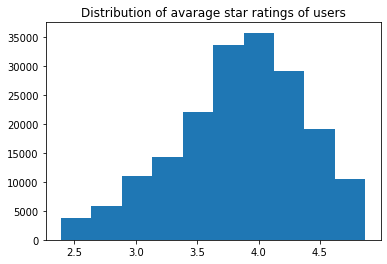

In [ ]:
#collapse-hide

#Visualize distribution of columns after removing outliers
plt.title('Distribution of avarage star ratings of users')
plt.hist(phoenix_nightlife_final.average_stars);

Looking at the table above, we see that after removing the extreme biases, the mean for average stars rated becomes more centered to the middle. Here, users have given 3,25-3,75 ratings almost just as much as 3,75-4,25.  We also notice on the x-axis that we have fewer users, as before the top was at 50000, whereas now it is on 35000. 

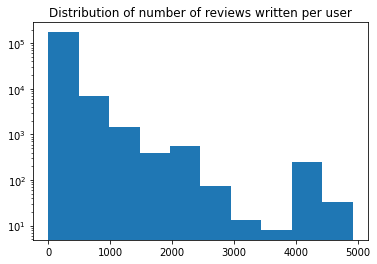

In [ ]:
#collapse-hide
plt.title('Distribution of number of reviews written per user')
plt.yscale('log')
plt.hist(phoenix_nightlife_final.num_reviews_written);

For the average reviews provided by the users, there were no changes for how many reviews the users averagely give after removing the outliers.

Now that we have removed the extreme opinion holders and users with below 10 reviews from our dataset, our dataset is clean and ready to be analysed.

####Mapping the Experience - Positive or Negative?

In [ ]:
#collapse-hide

#Map the star rating into a dummy variable: positive: 1, negative: 0 
experience_mapping = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1}
phoenix_nightlife_final['experience'] = phoenix_nightlife_final.review_stars.map(experience_mapping)
phoenix_nightlife_final.experience.sample(5)

133752    1
185152    1
158658    0
39114     1
126988    1
Name: experience, dtype: int64

In the cleaned data set, the mean as well as the median of the average star rating was around 4 stars. That is where we draw the line and said, anything approximately above the median should be a mapped to a positive ("1") experience and anything below, should be mapped to a negative ("0") experience. We relied on the fact, that the median splits the ordered list into precisely two halves. 

In [ ]:
#hide
name = '/content/drive/MyDrive/DSBA_Project/yelp_dataset/data_sets/final_preprocessed.csv'
phoenix_nightlife_final.to_csv(name, index=False)

---
#Analysis
---


##EDA - Exploratory Data Analysis

After the preprocessing of the data, we want to further explore the data and get a notion of the characteristics of the nightlife in Phoenix.

Let's start by looking at the final preprocessed data:


In [ ]:
#hide_input

#Read the current dataframe
path_phoenix_nightlife = '/content/drive/MyDrive/DSBA_Project/yelp_dataset/data_sets/final_preprocessed.csv'
phoenix_nightlife = pd.read_csv(path_phoenix_nightlife)
phoenix_nightlife.head()

,index,business_id,name,city,state,postal_code,stars,review_count,is_open,attributes,categories,user_id,review_stars,text,date,num_reviews_written,useful,friends,average_stars,experience
0,0,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020.0,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",3i095Fnh08yC-Q3VY0KeHQ,5,Our new favorite local spot. The owners are fa...,2018-08-30 01:39:54,5,1,"qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...",4.20,1
1,1,ku9ak9cQnIGBCXBtRd61tQ,Spoke & Wheel - Phoenix,Phoenix,AZ,85020.0,4.0,357,1,"{'NoiseLevel': ""u'average'"", 'WiFi': ""u'free'""...","Bars, Beer, Wine & Spirits, Sandwiches, Breakf...",3i095Fnh08yC-Q3VY0KeHQ,5,This is our favorite local spot! The wings are...,2018-08-30 01:37:47,5,1,"qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...",4.20,1
2,6,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020.0,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",7KZhUr0i3K202Ux1-OGOhQ,4,"This place is new and very close to us, so we ...",2018-07-30 01:57:23,69,90,"TBALUD-0FdJ6oGPqyCM8tQ, 6j_nmp1O3blJhCRDGQ5UvQ...",3.64,1
3,7,AueEbb9kao4lt6CYt06hqw,Okra Cookhouse & Cocktails,Phoenix,AZ,85014.0,4.0,227,0,"{'Music': ""{'dj': False}"", 'RestaurantsDeliver...","Italian, Restaurants, Nightlife, American (New...",7KZhUr0i3K202Ux1-OGOhQ,2,Good things: service was excellent and locatio...,2016-01-26 00:08:15,69,90,"TBALUD-0FdJ6oGPqyCM8tQ, 6j_nmp1O3blJhCRDGQ5UvQ...",3.64,0
4,8,SxqNnm4piAlFNNiBaXM0kg,Dilla Libre Uno,Phoenix,AZ,85020.0,4.5,194,1,"{'WiFi': ""u'free'"", 'WheelchairAccessible': 'T...","Restaurants, Tacos, Mexican, Food, Bars, Cockt...",7KZhUr0i3K202Ux1-OGOhQ,4,Very good locally owned well made and reasonab...,2016-05-11 22:13:11,69,90,"TBALUD-0FdJ6oGPqyCM8tQ, 6j_nmp1O3blJhCRDGQ5UvQ...",3.64,1


###Businesses in Phoenix
 
Let's have a look at the current nightlife businesses operating in Phoenix. Who are the most successful at attracting customers while maintaining a high customer satisfaction, and which businesses fail to do so?

In order to make our analysis more valid, we only want to consider businesses with more than 1000 reviews for assessing the top rated businesses. It is very likely that a business that is succesful in meeting the customers' needs are also likely going to attract more customers, hence they will get a higher number of reviews.

Similarly, a business that fails to deliver to their customers needs are likely not going to attract as many customers, and therefore they will in general hold less reviews associated with them. Therefore, when assessing the worst performing businesses, we only want to consider the businesses with above 100 reviews.

By filtering out in such a way, we are able to select the businesses that are constantly performing at the higest and lowest level, which will give the foundation for building the perfect business concept in Phoenix.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


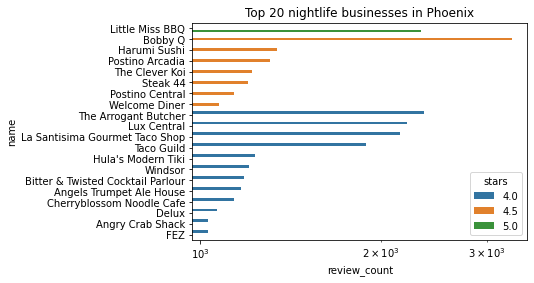

In [ ]:
#Collapse-hide

#We group the relevant columns and sort the values based on stars and review count.
star_rating = phoenix_nightlife.groupby(['business_id', 'name', 'city', 'review_count'])['stars'].mean()
star_rating = pd.DataFrame(star_rating).sort_values(by=['stars', 'review_count'], ascending = [False, False])
star_rating.reset_index(inplace=True)

#Filter out the businesses with review_count below 1000
star_rating_skimmed = star_rating[star_rating.review_count >= 1000]

#Visualization of the Top 20 Nightlife businesses in Phoenix with above 1000 reviews
sns.barplot(star_rating_skimmed.review_count[:20], star_rating_skimmed.name[:20], ci=None, hue=star_rating_skimmed.stars[:20]);
plt.title('Top 20 nightlife businesses in Phoenix')

plt.xscale('log')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


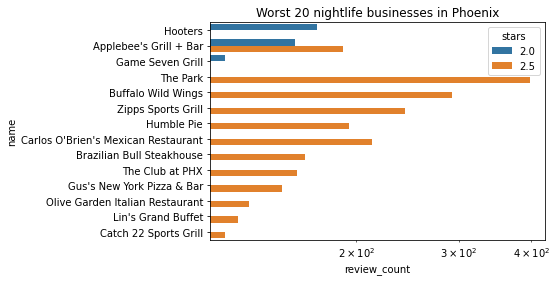

In [ ]:
#collapse-hide

#Filter out the businesses with review_count below 100
star_rating_skimmed = star_rating[star_rating.review_count >= 100]
star_rating_skimmed = pd.DataFrame(star_rating_skimmed).sort_values(by=['stars', 'review_count'], ascending = [True, False])

#Visualization of the 20 worst performing nightlife businesses in Phoenix
sns.barplot(star_rating_skimmed.review_count[:20], star_rating_skimmed.name[:20], ci=None, hue=star_rating_skimmed.stars[:20]);
plt.title('Worst 20 nightlife businesses in Phoenix')

plt.xscale('log')

##### The Best and Worst Perfoming Businesses

Above, we get an overview of the businesses with highest ratings and reviews, and now we have new businesses on 2nd, 3rd, 4th and 5th best performing businesses while the 1st remains as Little Miss BBQ.

Meanwhile, Hooter's is identified as the single worst performing business in the nightlife category in Phoenix, whille Applebees's Grill + Bar, The Park, and Buffalo Wild Wings, are close contenders to be the worst businesses in providing a positive customer experience.

We can conclude from the above two barplots that 'Little Miss BBQ' has a significant review count, and still maintains to keep an average star rating of 5. On the contrary, one of the lowest performing entities which is interesting to look at is 'Hooters' with a review count above 200, but remains as the worst performing business. These two companies will be used as case studies in the review insights chapter.

Note: In the tabular table for worst performing businesses, Applebee's Grill + Bar shows up multiple times and these represent multiple entities in Phoenix, as these all have different business IDs.

###Most popular categories of nightlife in Phoenix

In this section, we want to explore which business concepts are the most popular in the nightlife of Phoenix

In order to do this, we split the category column containing the various categories which a business belongs under into several rows. Now, the businesses occur in several rows with the respective category. In this way, we can count how mny reviews fall under each category. See below example with Spoke & Wheel:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


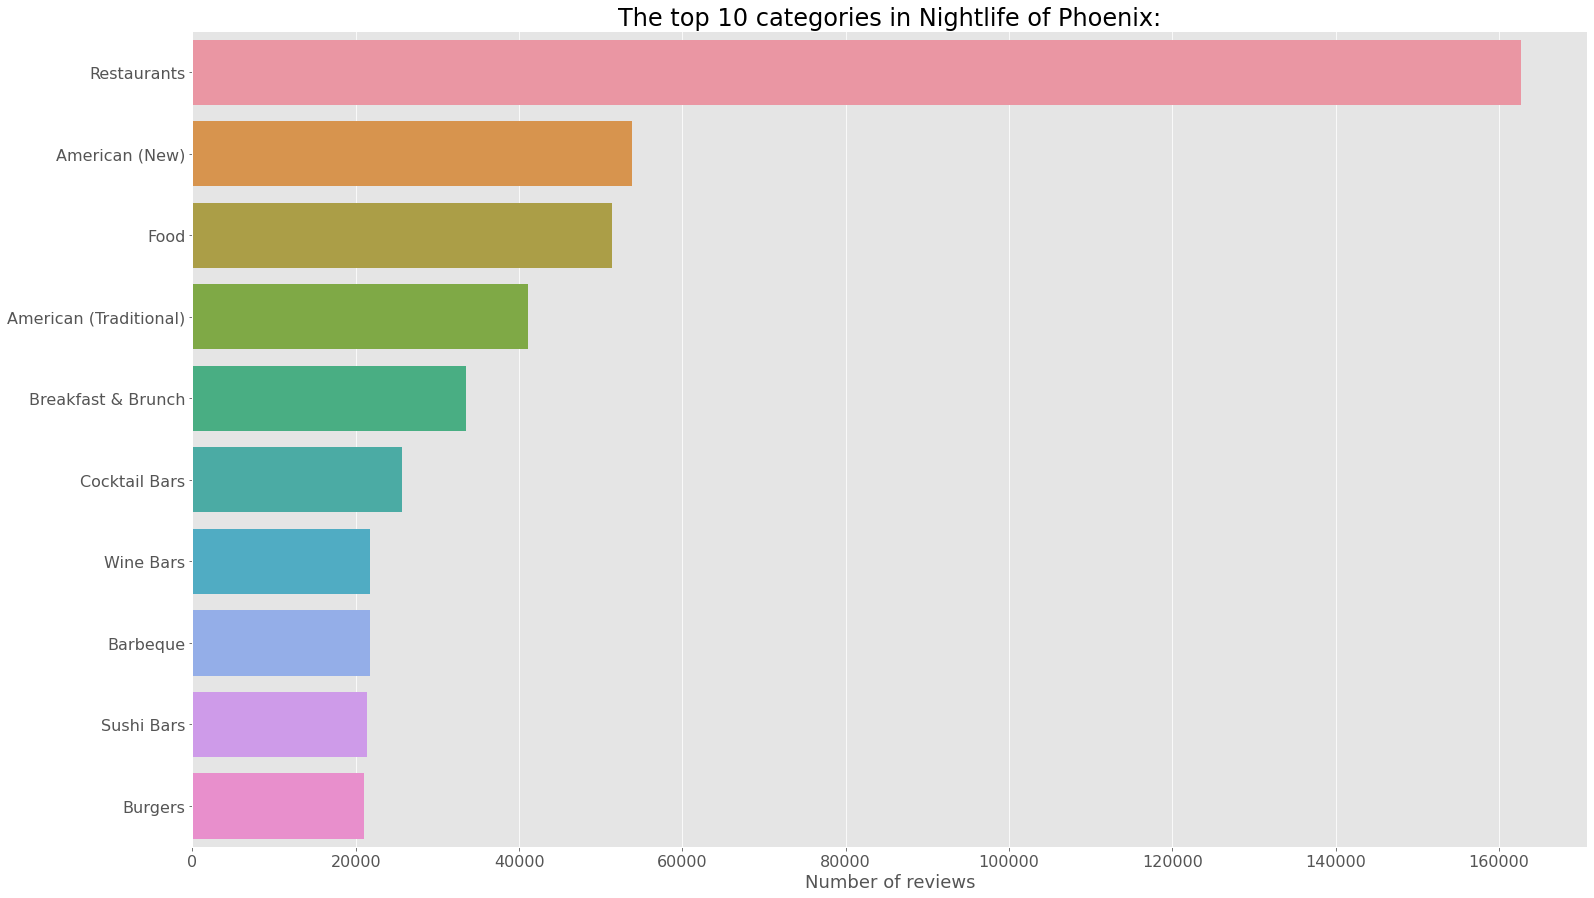

In [ ]:
#collapse-hide

#Split the categories column into rows by exploding evey element in the categories column
phoenix_top_cat = phoenix_nightlife.assign(categories = phoenix_nightlife.categories.str.split(', ')).explode('categories')
phoenix_top_cat = phoenix_top_cat[(phoenix_top_cat.categories != 'Bars') & (phoenix_top_cat.categories != 'Nightlife')]

#Filter out the businesses with equal or above 10 rviews
phoenix_weight = phoenix_top_cat[phoenix_top_cat.review_count >= 10]

#Visualization of the top 10 categories in nightlife of Phoenix
Visualization = phoenix_weight.categories.value_counts()[:10]
viz = pd.DataFrame(Visualization)

plt.figure(figsize= (25, 15))
plt.style.use('ggplot')
sns.barplot(viz.categories, viz.index)
plt.title('The top 10 categories in Nightlife of Phoenix:', fontdict= {'fontsize': 24})
plt.xlabel('Number of reviews', fontdict= {'fontsize': 18})
plt.tick_params(labelsize= 16)
plt.savefig('categories_nightlife.png')

From the above table, we can conclude that 'Restaurants' is the most popular business concept that has been reviewed, specifically American (new) themed restaurants. Secondly, bars score highly, specifically cocktail bars are popular in Phoenix.

### Assessing if experience has a significant effect on whether or not a business stays open

So how important are reviews for a business in Phoenix? Does it define whether a business will remain open or not? With these questions in mind, we want to test the probability that a business is closed based on experience.

In [ ]:
#Collapse-hide

#The percentage of how many businesses are open and closed
phoenix_weight.is_open.value_counts(normalize= True)

1    0.869059
0    0.130941
Name: is_open, dtype: float64

In [ ]:
#collapse-show

#Generate a table that shows the correlation of is_open and experience
pd.crosstab(phoenix_weight.is_open, phoenix_weight.experience, normalize= True)

experience,0,1
is_open,,
0,0.044795,0.086146
1,0.240499,0.628560


We want to compute a simple cross tabulation of the two factors, If a business is open and the overall experience. The return is a frequency table and here we can see that there is a significant proportion of positive experience for the businesses that closed down, compared to the negative experiences. Thus, there is a no correlation between the experience and whether the business stays open or not. 

##Topic Modeling - Review Insights

In this chapter, we are aiming to gain information from analyzing the reviews. We divide the final data set into different subgroups, each characterized by a special condition. We compare the language of the reviews for businesses that provide a positive experience vs for businesses that provide a negative experience. We analyze the language/topics of the reviews when they are grouped based on the review star and compare them against each other. Furthermore, we have a look at the best and worst performing businesses’ reviews, with the intent to pinpoint some specifics that make them either one of the best or one of the worst, that Phoenix has to offer.

### Positive experiences

This section inspects the reviews that belong to the subgroup of phoenix businesses that have an avarage rating  higher than or equal to 4 stars.

We use both kinds of vectorizer that sklearn offers and apply the SVD algorithm to both document term matrices to see if the outcome is similiar. We expect that the outcomes will be identical.

We create the document term matrix here, that we will decompose later with the intent to find dependencies in it.

In [ ]:
#collapse-hide

#Filter data to show positive experiences
phoenix = phoenix_nightlife
phoenix_pos = phoenix[phoenix.experience == 1]

#Pick n = 5000 random sample, to save memory.
##Simple Random Sample assumption (a sufficient random! sample can be representative of the population that it is taken from).
text = phoenix_pos.text.sample(5000, random_state= 42)

#Create bag-of-words (discrete) representation of reviews
c_vectorizer = TfidfVectorizer(stop_words= 'english')
dtm_c = c_vectorizer.fit_transform(text).toarray()
vocab_c = np.array(c_vectorizer.get_feature_names())

tf_vectorizer = CountVectorizer(stop_words= 'english')
dtm_t = tf_vectorizer.fit_transform(text).todense()
vocab_t = np.array(tf_vectorizer.get_feature_names())

# Check shape of document term matrix
print(f'The shape of the document term matrix is : {dtm_c.shape} and the number of tokens in the vocabulary is : {len(vocab_c)}.')
dtm_c.shape == dtm_t.shape

The shape of the document term matrix is : (5000, 14900) and the number of tokens in the vocabulary is : 14900.


True

We use a simple helper function to help extract the top words from the "abstract" topics.

In [ ]:
#collapse-hide

# helper function
def show_topics(V, vocab):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words(x) for x in V])
    return [' '.join(x) for x in topic_words]

#### Singular Value Decomposition (randomized in order to enhance speed)

This is a low rank approximation algorithm (we try to "recreate" the column space of our original matrix with a smaller matrix) and we compute a full svd on the smaller matrix.

In [ ]:
#collapse-hide

d = 5 # number of topics
num_top_words = 10 # number of top words

U_c, s_c, Vh_c = utils.extmath.randomized_svd(dtm_c, d, random_state= 42)

U_t, s_t, Vh_t = utils.extmath.randomized_svd(dtm_c, d, random_state= 42)

Topics from the document term matrix by CountVectorizer.

In [ ]:
#collapse-hide

show_topics(Vh_c, vocab_c)

['great place food good service love time really amazing bar',
 'great service food atmosphere awesome place beer drinks selection staff',
 'sushi happy hour roll rolls place love bar prices menu',
 'sushi service bbq best food great brisket amazing roll rolls',
 'love bbq best place brisket staff ve amazing friendly coffee']

Topics from the document term matrix by TfidfVectorizer.

In [ ]:
#collapse-hide
show_topics(Vh_t, vocab_t)

['great place food good service love time really amazing bar',
 'great service food atmosphere awesome place beer drinks selection staff',
 'sushi happy hour roll rolls place love bar prices menu',
 'sushi service bbq best food great brisket amazing roll rolls',
 'love bbq best place brisket staff ve amazing friendly coffee']

The topics contain some noise; however, we can use deductive reasoning to deduce that the topics are about great service, quality food and drink selection and a lovely atmosphere.

As they both produced the same outcome, we only save one list.
We will import this list later when we create a visual summary of this finding.

In [ ]:
#collapse-hide
positive_top_topics = show_topics(Vh_t, vocab_t)

In [ ]:
#hide
name = 'data/positive_top_words.csv'
pd.Series(positive_top_topics).to_csv(name, index= False)

### Negative experiences

This section inspects the reviews that belong to the subgroup of phoenix businesses that have an avarage rating  smaller than or equal to 3.5 stars.

We use both kinds of vectorizer that sklearn offers (TfidfVectorizer and c_vectorizer) and apply the SVD algorithm to both document term matrices to see if the outcome is similiar. We expect that the outcomes will be identical.

We create the document term matrix here, that we will decompose later with the intent to find dependencies in it.

In [ ]:
#collapse-hide

#Filter data to show positive experiences
phoenix_neg = phoenix[phoenix.experience == 0]

#Pick n = 5000 random sample, to save memory.
##Simple Random Sample assumption (a sufficient random! sample can be representative of the population that it is taken from).
text = phoenix_neg.text.sample(5000, random_state= 42)


#Create bag-of-words (discrete) representation of reviews
c_vectorizer = TfidfVectorizer(stop_words= 'english')
dtm_c = c_vectorizer.fit_transform(text).toarray()
vocab_c = np.array(c_vectorizer.get_feature_names())

tf_vectorizer = CountVectorizer(stop_words= 'english')
dtm_t = tf_vectorizer.fit_transform(text).todense()
vocab_t = np.array(tf_vectorizer.get_feature_names())

# Check shape of document term matrix
print(f'The shape of the document term matrix is : {dtm_c.shape} and the number of tokens in the vocabulary is : {len(vocab_c)}.')
dtm_c.shape == dtm_t.shape

The shape of the document term matrix is : (5000, 16899) and the number of tokens in the vocabulary is : 16899.


True

We use the same helper function that we used above to extract the top words.

In [ ]:
#collapse-hide
# helper function
def show_topics(V, vocab):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words(x) for x in V])
    return [' '.join(x) for x in topic_words]

#### Singular Value Decomposition (randomized in order to enhance speed)

This is a low rank approximation algorithm (we try to "recreate" the column space of our original matrix with a smaller matrix) and we compute a full svd on the smaller matrix.

In [ ]:
#collapse-hide
d = 5 # number of topics
num_top_words = 10 # number of top words

U_c, s_c, Vh_c = utils.extmath.randomized_svd(dtm_c, d, random_state= 42)

U_t, s_t, Vh_t = utils.extmath.randomized_svd(dtm_c, d, random_state= 42)

Topics from the document term matrix created by CountVectorizer

In [ ]:
#collapse-hide
show_topics(Vh_c, vocab_c)

['food good place service just like time great order ordered',
 'minutes order asked table waited took time told said wait',
 'bar place great beer drinks music atmosphere happy people drink',
 'sushi roll rolls fish tuna hour happy quality rice spicy',
 'food service good slow great took atmosphere average minutes terrible']

Topics from the document term matrix created by TfidfVectorizer

In [ ]:
#collapse-hide
show_topics(Vh_t, vocab_t)

['food good place service just like time great order ordered',
 'minutes order asked table waited took time told said wait',
 'bar place great beer drinks music atmosphere happy people drink',
 'sushi roll rolls fish tuna hour happy quality rice spicy',
 'food service good slow great took atmosphere average minutes terrible']

The topics contain some noise; however, we can use deductive reasoning to deduce that the topics are about slow service, slow staff.

As they both produced the same outcome, we only save one list.
We save it, so that later we can visualize the conclusion.

In [ ]:
#collapse-hide
negative_top_topics = show_topics(Vh_t, vocab_t)

In [ ]:
#hide
name = 'data/negative_top_words.csv'
pd.Series(negative_top_topics).to_csv(name, index= False)

###Topics by Star Rating

In this section, we look into the differences of the businesses of the different "levels" of ratings that they achieved.

We use the TfidfVectorizer and apply the NMF algorithm to the document term matrix. Create a different document term matrix for each review stars to see if we can "pick up" some differences among the different reviews.

In [ ]:
#collapse-hide
phoenix_1 = phoenix[phoenix.review_stars == 1]
phoenix_2 = phoenix[phoenix.review_stars == 2]
phoenix_3 = phoenix[phoenix.review_stars == 3]
phoenix_4 = phoenix[phoenix.review_stars == 4]
phoenix_5 = phoenix[phoenix.review_stars == 5]

*Pick n = 5000 random sample, to save memory.* Simple Random Sample assumption.

In [ ]:
#collapse-hide
text_1 = phoenix_1.text.sample(5000, random_state= 42)
text_2 = phoenix_2.text.sample(5000, random_state= 42)
text_3 = phoenix_3.text.sample(5000, random_state= 42)
text_4 = phoenix_4.text.sample(5000, random_state= 42)
text_5 = phoenix_5.text.sample(5000, random_state= 42)

#### Create bag-of-words (discrete) representation of reviews

We create the document term matrices here for the different "subgroups".

In [ ]:
#collapse-hide
vectorizer1 = TfidfVectorizer(stop_words= 'english')
dtm_1 = vectorizer1.fit_transform(text_1).toarray()
vocab_1 = np.array(vectorizer1.get_feature_names())

vectorizer2 = TfidfVectorizer(stop_words= 'english')
dtm_2 = vectorizer2.fit_transform(text_2).toarray()
vocab_2 = np.array(vectorizer2.get_feature_names())

vectorizer3 = TfidfVectorizer(stop_words= 'english')
dtm_3 = vectorizer3.fit_transform(text_3).toarray()
vocab_3 = np.array(vectorizer3.get_feature_names())

vectorizer4 = TfidfVectorizer(stop_words= 'english')
dtm_4 = vectorizer4.fit_transform(text_4).toarray()
vocab_4 = np.array(vectorizer4.get_feature_names())

vectorizer5 = TfidfVectorizer(stop_words= 'english')
dtm_5 = vectorizer5.fit_transform(text_5).toarray()
vocab_5 = np.array(vectorizer5.get_feature_names())

In [ ]:
#hide

# Check shape of document-term matrices
dtm_1.shape, dtm_2.shape, dtm_3.shape, dtm_4.shape, dtm_5.shape

((5000, 16182), (5000, 16978), (5000, 16771), (5000, 15881), (5000, 14317))

In [ ]:
#hide

# Check length of vocabularies
len(vocab_1), len(vocab_2), len(vocab_3), len(vocab_4), len(vocab_5)

(16182, 16978, 16771, 15881, 14317)

Again, we use the helper function to extract the top 10 words from the topics.

In [ ]:
#collapse-hide

# helper function
def show_topics(H, vocab):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words(x) for x in H])
    return [' '.join(x) for x in topic_words]

#### Non-negative Matrix Factorization

This is not an exact decomposition, and a fairly new technique. Researchers have been working hard for decades to create this algorithm. We used sklearn's implementation (other ones exist too).

In [ ]:
#collapse-hide

d = 5 # number of topics
num_top_words = 10 # number of top words


nnmf_1 = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W_1 = nnmf_1.fit_transform(dtm_1)
H_1 = nnmf_1.components_

nnmf_2 = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W_2 = nnmf_2.fit_transform(dtm_2)
H_2 = nnmf_2.components_

nnmf_3 = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W_3 = nnmf_3.fit_transform(dtm_3)
H_3 = nnmf_3.components_

nnmf_4 = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W_4 = nnmf_4.fit_transform(dtm_4)
H_4 = nnmf_4.components_

nnmf_5 = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W_5 = nnmf_5.fit_transform(dtm_5)
H_5 = nnmf_5.components_

Topics from 1 star reviews

In [ ]:
#collapse-hide
show_topics(H_1, vocab_1)

['minutes order table came waited server asked took waitress wait',
 'chicken ordered sushi like good food salad cheese sauce tasted',
 'just don place time said like really know people want',
 'service food horrible terrible place good worst slow bad customer',
 'bar bartender drink drinks beer walked sat night staff bartenders']

The topics contain some noise; however, we can use deductive reasoning to deduce that the topics are about slow service, horrible food, and slow staff. What we would expect from a 1-star review.

Topics from 2 star reviews

In [ ]:
#collapse-hide
show_topics(H_2, vocab_2)

['place bar like just really beer don people time nice',
 'chicken cheese ordered sauce salad bbq sandwich meat good burger',
 'sushi roll rolls fish tuna fresh rice spicy quality salmon',
 'minutes order table server came took time wait asked waitress',
 'food service good great slow better average bad mediocre atmosphere']

The topics contain some noise; however, we can use deductive reasoning to deduce that the topics are still about slow service, slow staff, but the food is probably a bit better. Not too much of an improvement, compared to the 1-star reviews.

Topics from 3 star reviews

In [ ]:
#collapse-hide
show_topics(H_3, vocab_3)

['time food order came server minutes table just got wait',
 'good chicken sauce cheese bbq salad ordered pork brisket sandwich',
 'sushi roll rolls happy hour fresh spicy fish tuna good',
 'place food good bar great service nice drinks beer hour',
 'burger fries burgers good medium delux bun cheese beer patty']

The topics contain some noise; however, we can use deductive reasoning to deduce that the topics are about what a “usual” 3-star review has, OK food, OK service. Nothing stands out.

Topics from 4 star reviews

In [ ]:
#collapse-hide
show_topics(H_4, vocab_4)

['place bar like drinks beer night just music fun cool',
 'chicken ordered cheese burger good bbq got fries salad sauce',
 'sushi rolls roll fresh fish ve place good tuna spicy',
 'great good food service atmosphere friendly staff nice love excellent',
 'happy hour great menu specials drinks wine love appetizers prices']

The topics contain some noise; however, we can use deductive reasoning to deduce that the topics are about. We can see a definite improvement, the food and drinks are getting better, as well as the quality of the service.

Topics from 5 star reviews

In [ ]:
#collapse-hide
show_topics(H_5, vocab_5)

['good really like just time ordered delicious try menu got',
 'bbq best brisket ribs pork ve amazing meat pulled line',
 'sushi rolls roll fresh best quality place happy hour japanese',
 'great food service atmosphere amazing excellent definitely drinks awesome wonderful',
 'place love friendly staff bar coffee drinks beer fun favorite']

Despite the presence of noise, we can deduce that the topics are about. The reviews mention that the atmosphere is amazing, the food is delicious and the different kinds of meats (good piece of steak or a nice piece of pork) are rather tasty, the staff is friendly and the customers enjoy the service.

We save the topic words into CSVs, that we later import to create word clouds.

In [ ]:
#collapse-hide
one_top_topics = show_topics(H_1, vocab_1)
two_top_topics = show_topics(H_2, vocab_2)
three_top_topics = show_topics(H_3, vocab_3)
four_top_topics = show_topics(H_4, vocab_4)
five_top_topics = show_topics(H_5, vocab_5)

In [ ]:
#hide
name1 = 'data/one_top_words.csv'
pd.Series(one_top_topics).to_csv(name1, index= False)

name2 = 'data/two_top_words.csv'
pd.Series(two_top_topics).to_csv(name2, index= False)

name3 = 'data/three_top_words.csv'
pd.Series(three_top_topics).to_csv(name3, index= False)

name4 = 'data/four_top_words.csv'
pd.Series(four_top_topics).to_csv(name4, index= False)

name5 = 'data/five_top_words.csv'
pd.Series(five_top_topics).to_csv(name5, index= False)

### Wordcloud Visualization of Topics

In this section we visualize the findings of the above described topic modeling tasks that we did.

We can see, that the all the imports have the same shape, 5 rows (topics) and 1 column (10 top words from each topic)

In [ ]:
#collapse-hide
# Import all CSVs at once as the process of creating wordcloud is the same for all CSVs
five = pd.DataFrame(five_top_topics)
four = pd.DataFrame(four_top_topics)
three = pd.DataFrame(three_top_topics)
two = pd.DataFrame(two_top_topics)
one = pd.DataFrame(one_top_topics)
positive = pd.DataFrame(positive_top_topics)
negative = pd.DataFrame(negative_top_topics) 


# Check shapes of data frames, to make sure import worked
five.shape, four.shape, three.shape, two.shape, one.shape, positive.shape, negative.shape

((5, 1), (5, 1), (5, 1), (5, 1), (5, 1), (5, 1), (5, 1))

In [ ]:
#hide
# Rename the columns
five.columns = ['text']
four.columns = ['text']
three.columns = ['text']
two.columns = ['text']
one.columns = ['text']
positive.columns = ['text']
negative.columns = ['text']

We transform the lists to long strings, as the WordCloud function only accepts strings.

In [ ]:
#collapse-hide
# Concatenate top topic words into string
text_five = " ".join(a for a in five.text)
text_four = " ".join(b for b in four.text)
text_three = " ".join(c for c in three.text)
text_two = " ".join(d for d in two.text)
text_one = " ".join(e for e in one.text)
text_positive = " ".join(f for f in positive.text)
text_negative = " ".join(g for g in negative.text)

##### Display of Word Clouds

######Wordcloud 1 stars

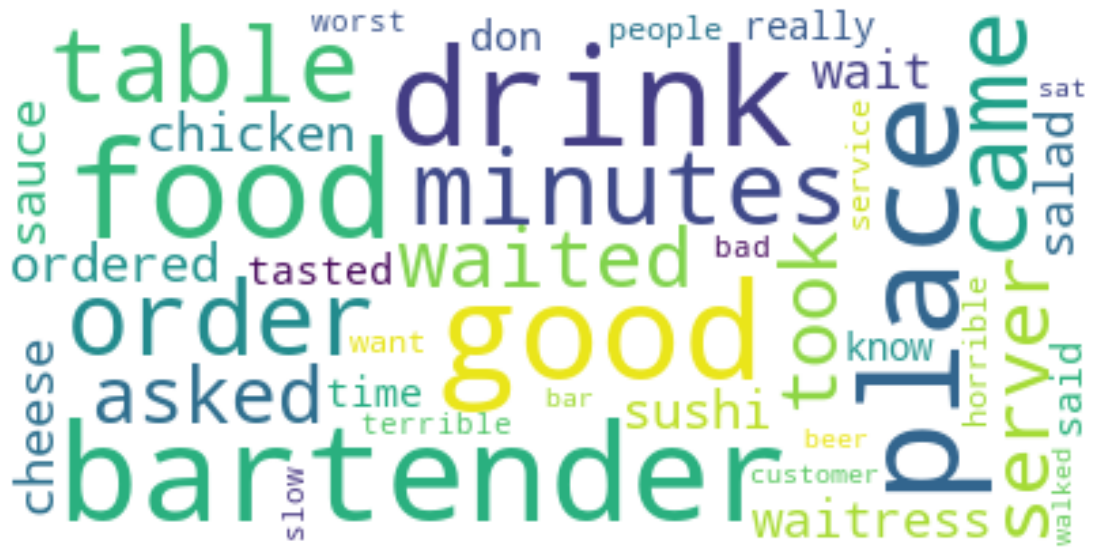

In [ ]:
#collapse-hide
wc1 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_one)
plt.figure(figsize=[20, 10])
plt.imshow(wc1, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc1.to_file('pictures/one_star.png');

######Wordcloud 2 stars

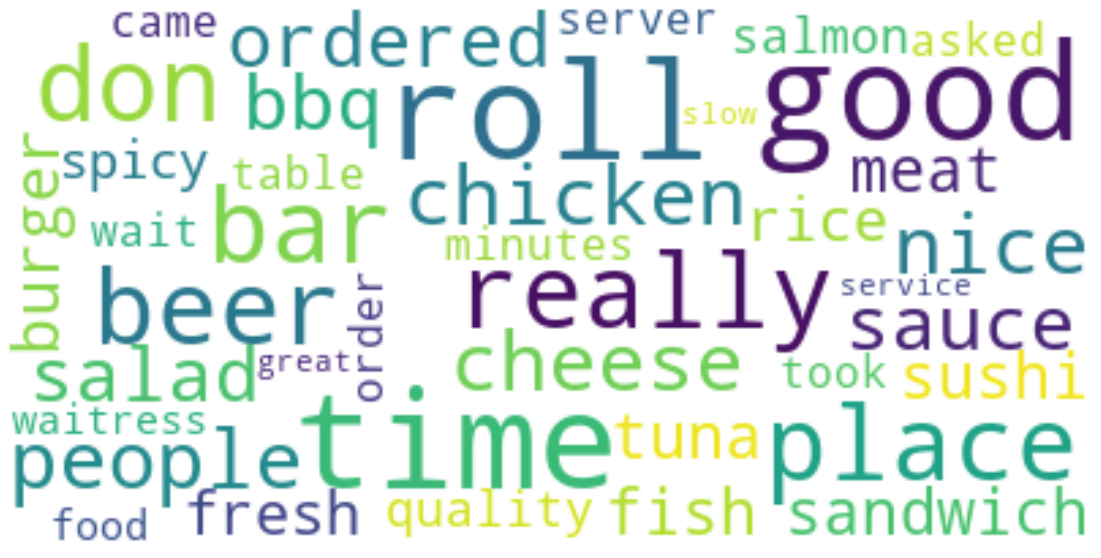

In [ ]:
#collapse-hide
wc2 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_two)
plt.figure(figsize= [20, 10]) 
plt.imshow(wc2, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc2.to_file('pictures/two_star.png');

######Wordcloud 3 stars

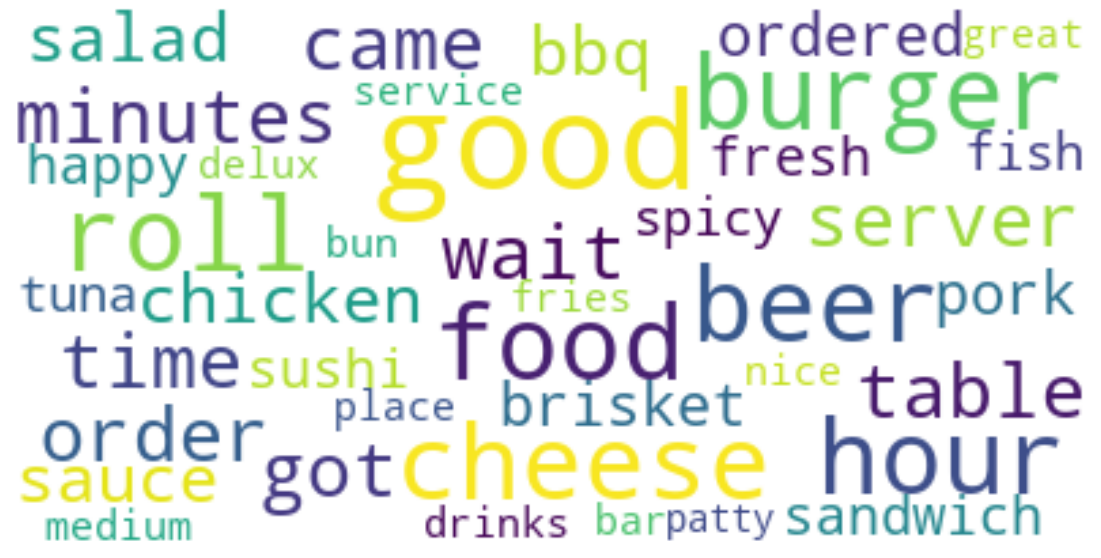

In [ ]:
#collapse-hide
wc3 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_three)
plt.figure(figsize= [20, 10]) 
plt.imshow(wc3, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc3.to_file('pictures/three_star.png');

######Wordcloud 4 stars

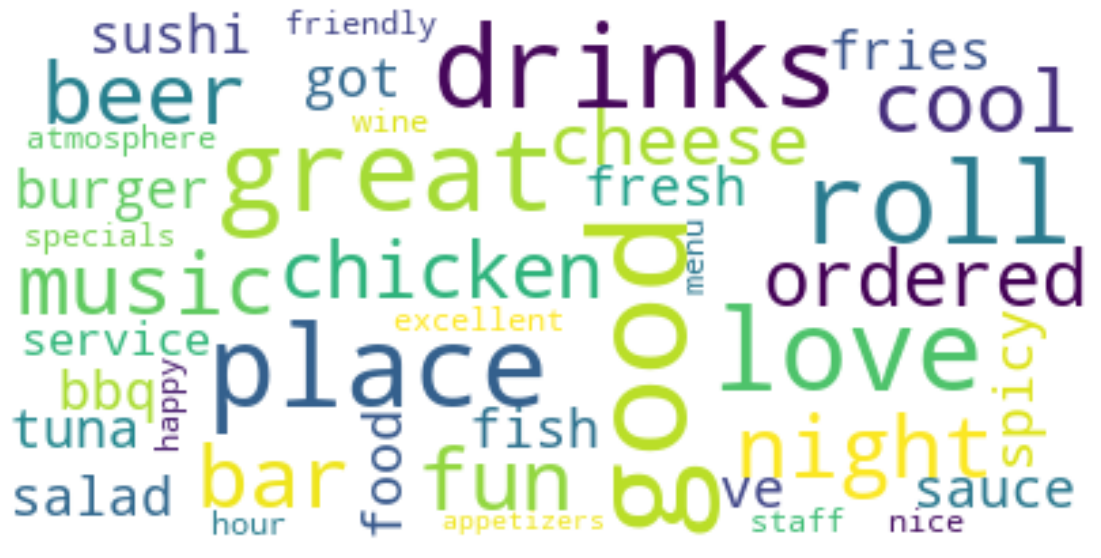

In [ ]:
#collapse-hide
wc4 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_four)
plt.figure(figsize= [20, 10])
plt.imshow(wc4, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc4.to_file('pictures/four_star.png');

######Wordcloud 5 stars

In [ ]:
#collapse-hide
wc5 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_five)
plt.figure(figsize= [20, 10])
plt.imshow(wc5, interpolation= 'bilinear')
plt.axis('off')
plt.show()

NameError: ignored

In [ ]:
#hide
# Save wordcloud
wc5.to_file('pictures/five_star.png');

######Wordcloud Positive Experience

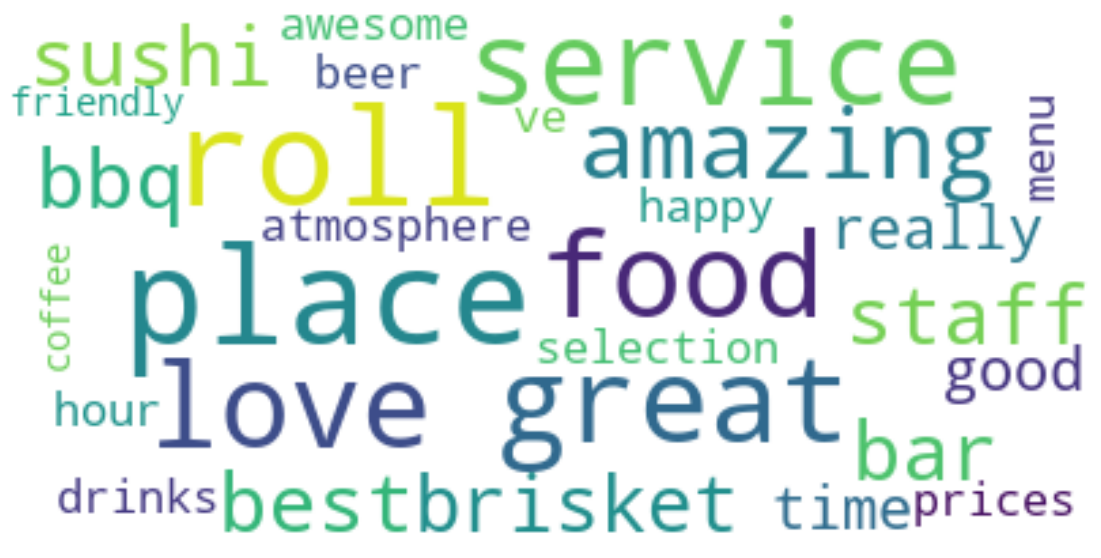

In [ ]:
#collapse-hide
wc6 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_positive)
plt.figure(figsize= [20, 10])
plt.imshow(wc6, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc6.to_file('pictures/positive.png');

######Wordcloud Negative Experience

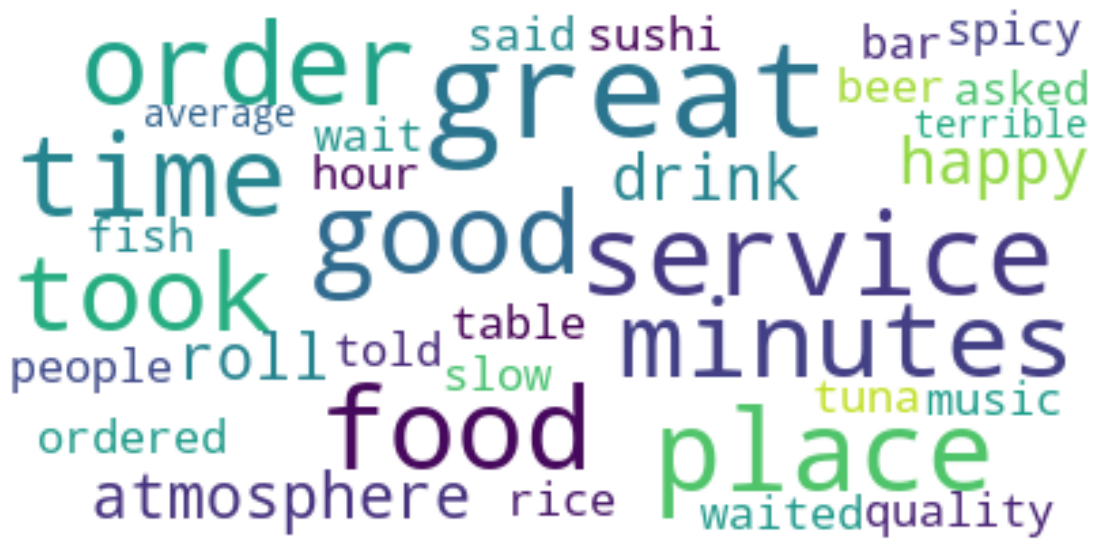

In [ ]:
#collapse-hide
wc7 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_negative)
plt.figure(figsize= [20, 10])
plt.imshow(wc7, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc7.to_file('pictures/negative.png');

### Topics and Word Clouds by Business

#### Little Miss BBQ

In this section we inspect Little Miss BBQ as it is this business is rather liked in Phoenix.

In [ ]:
#hide
df = phoenix_nightlife

Data Frame that only contains entries for Little Miss BBQ

In [ ]:
#hide
# Subset data set 
little_miss = df[df.name == 'Little Miss BBQ']
little_miss.head(3)

,business_id,name,city,state,postal_code,stars,review_count,is_open,attributes,categories,user_id,review_stars,text,date,num_reviews_written,useful,friends,average_stars,experience
156,Xg5qEQiB-7L6kGJ5F4K3bQ,Little Miss BBQ,Phoenix,AZ,85034.0,5.0,2329,1,"{'RestaurantsDelivery': 'False', 'RestaurantsA...","Barbeque, Restaurants",ocB1WhramMTkICc5sZ1bUQ,5,Hands down the best bbq I've had in my whole l...,2016-07-08 19:00:46,371,658,"MfxdEmaH-0_ITpuXU4Hgzg, Jl3FZ3tPi0GpBIogfUNnPg...",3.71,1
852,Xg5qEQiB-7L6kGJ5F4K3bQ,Little Miss BBQ,Phoenix,AZ,85034.0,5.0,2329,1,"{'RestaurantsDelivery': 'False', 'RestaurantsA...","Barbeque, Restaurants",sTcYq6goD1Fa2WS9MSkSvQ,5,Holy mother of god why did it take me so long ...,2017-11-07 18:22:17,841,3749,"B820kFgFc1HyTFIuMoWH-w, PMe-hl9fP2g074H4SAfIKA...",3.62,1
1113,Xg5qEQiB-7L6kGJ5F4K3bQ,Little Miss BBQ,Phoenix,AZ,85034.0,5.0,2329,1,"{'RestaurantsDelivery': 'False', 'RestaurantsA...","Barbeque, Restaurants",ZE67Ck4gWtJBAN95AKMyZg,5,"I mean, does this place need another 5 star re...",2016-03-02 18:00:31,32,105,"Hyli6YWc-0PxRAerObzZIQ, LIj_X_4luQAWf3i10Gx1OA...",3.91,1


In [ ]:
#hide
little_miss.shape

(2106, 19)

##### Vectorize text

We create the document term matrix here. The shape of the matrix (2387 x 7806) can be seen below along with the length of the vocabulary (7806). This means that we have 2387 reviews (documents) for Little Miss BBQ and got 7806 tokens after vectorization.

In [ ]:
#collapse-hide
# get reviews
text = little_miss.text

# vectorize
vectorizer = TfidfVectorizer(stop_words= 'english')
dtm = vectorizer.fit_transform(text).toarray()
vocab = np.array(vectorizer.get_feature_names())

# shape of dtm
dtm.shape, len(vocab)

((2106, 7478), 7478)

Helper function to extract top words

In [ ]:
#collapse-hide
# Helper function
def show_topics(H, vocab):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words(x) for x in H])
    return [' '.join(x) for x in topic_words]

##### Matrix decomposition

We used the non-negative matrix factorization.

In [ ]:
#collapse-hide
d = 5 # number of topics
num_top_words = 10 # number of top words


nnmf = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W = nnmf.fit_transform(dtm)
H = nnmf.components_

Topics extracted

In [ ]:
#collapse-hide
show_topics(H, vocab)

['good little bbq meat just miss like place time sauce',
 'best bbq ve hands worth early wait phoenix az amazing',
 'line wait worth hour long waited waiting got 10 hours',
 'brisket ribs fatty pork grits sausage beef pie pulled pecan',
 'great food place service friendly staff amazing awesome love customer']

The reviews of Little Miss BBQ contain “topics” that we have seen already in the 5-star review “topics” as well as in the positive experience “topics”. The food, especially the barbeque (BBQ) here is great, the staff is friendly, and it seems that people are even happy to stand in line and wait for this experience.

##### Wordcloud Little Miss BBQ

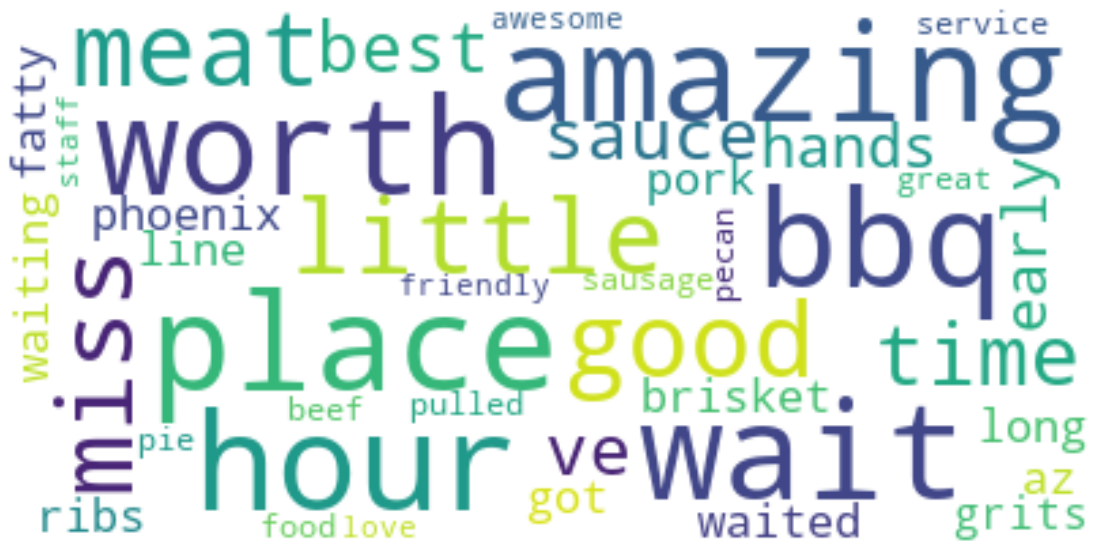

In [ ]:
#collapse-hide
words = show_topics(H, vocab)

# join list elements into one string
text_little_miss = " ".join(a for a in words)

wc = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_little_miss)
plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc.to_file('pictures/little_miss_BBQ.png');

#### Hooters

In this section we have a closer look at one of the worst performing business in Phoenix.

In [ ]:
#hide
data = df
# Subset data set 
hooters = data[data.name == 'Hooters']
hooters.head(3)

,business_id,name,city,state,postal_code,stars,review_count,is_open,attributes,categories,user_id,review_stars,text,date,num_reviews_written,useful,friends,average_stars,experience
548,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,85035.0,2.0,106,1,"{'NoiseLevel': ""'very_loud'"", 'WiFi': ""'no'"", ...","Nightlife, American (Traditional), Chicken Win...",zY4RR6kG0AgioqbgpXCsFg,1,"I hate to give a one star, but this place need...",2019-01-19 03:05:09,50,12,"Ar1JMNPrOA4lCj8RkjmWoQ, XpofMKrKlQhx1hXunBPIqA...",3.85,0
698,k4qx8DacgRbM9vpVbWc3zA,Hooters,Phoenix,AZ,85004.0,2.0,237,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Nightlife, Bars, Sports Bars, American (Tradit...",8Aj0YKThtXkSuauONIzYfQ,4,This downtown Phoenix Hooters has become a com...,2011-08-18 00:17:21,176,313,"QyXoqXAxOV2DLNPOZKuEIw, F6uSoMUXNssNTlNRzfjXYg...",4.21,1
1087,k4qx8DacgRbM9vpVbWc3zA,Hooters,Phoenix,AZ,85004.0,2.0,237,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Nightlife, Bars, Sports Bars, American (Tradit...",Z4jbHK1-U6pVfI6RfNUSow,3,"After catching a movie, I tagged along with my...",2018-05-24 23:02:41,37,32,"dlIugG_I6E3R6H35oDFC9w, _u_OiLc12aVBp9ckzKpvvg...",3.73,0


##### Vectorize text

We create the document term matrix here. The shape of the matrix (478 x 3683) can be seen below along with the length of the vocabulary (3683). This means that we have 487 reviews (documents) for Hooters and got 3683 tokens after vectorization.

In [ ]:
#collapse-hide
text = hooters.text

# vectorize text
vectorizer = TfidfVectorizer(stop_words= 'english')
dtm = vectorizer.fit_transform(text).toarray()
vocab = np.array(vectorizer.get_feature_names())

# check dtm and vocab size
dtm.shape, len(vocab)

((370, 3323), 3323)

Helper function to extract top words

In [ ]:
#collapse-hide
# Helper function
def show_topics(H, vocab):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words(x) for x in H])
    return [' '.join(x) for x in topic_words]

##### Matrix decomposition

We used the non-negative matrix factorization.

In [ ]:
#collapse-hide
d = 5 # number of topics
num_top_words = 10 # number of top words


nnmf = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W = nnmf.fit_transform(dtm)
H = nnmf.components_

Topics top words for Hooters

In [ ]:
#collapse-hide
show_topics(H, vocab)

['minutes waited order waitress service food 20 took didn drinks',
 'good hooters beer food place girls cold pretty wings service',
 'great service atmosphere server fish best month attentive helpful wings',
 'wings chicken ordered got time salad hot sauce fries buffalo',
 'said manager told wait asked tables table hostess hooters did']

Based on the language of the reviews, Hooters in Phoenix seems to embody the “usual negative experience”. The service is slow and sloppy, the food is not the great, but probably the lovely staff makes up for some of the shortcomings.

##### Wordcloud Hooters

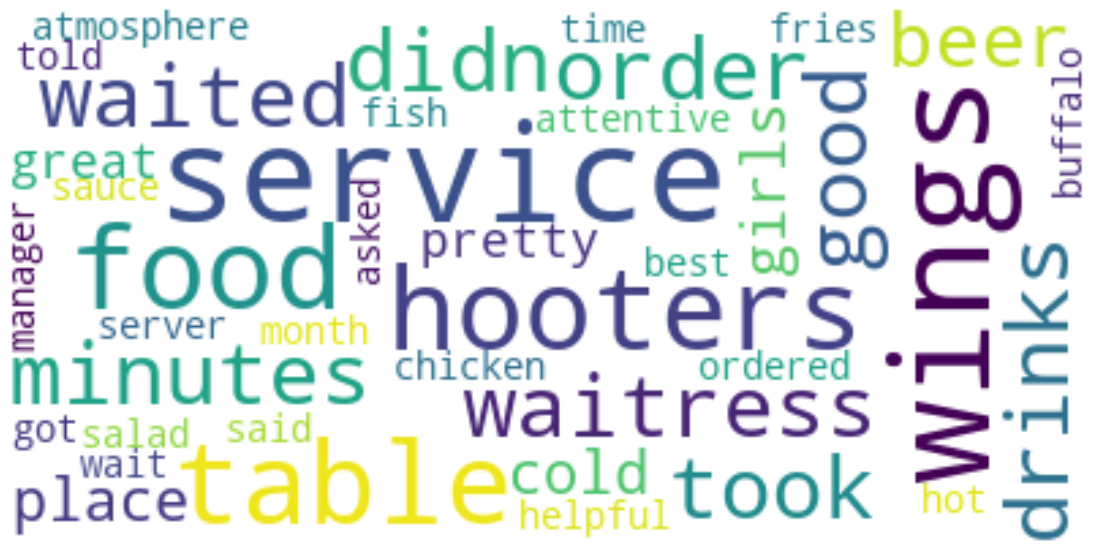

In [ ]:
#collapse-hide
words = show_topics(H, vocab)

# concatenate string elements into a string
text_hooters = " ".join(a for a in words)

wc = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_hooters)
plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc.to_file('pictures/hooters.png');

### Summary of Topic Modeling

The outcome of the topic modeling corresponds to our intuition, that businesses would get bad reviews if their staff was rude, the service took ages and the quality of the product was sub-optimal.
Words, such as "horrible", "terrible" and "rude" were found among the 1 star reviews, indicating, that potentially the staff was rude, as well as their overall experience was bad. The 2 star reviews contained words such as "slow" and "hour" which allows us to assume that the businesses were down-rated because of the speed of their service. Reviews from the 4, 5 star ranges seemed to highlight the fact, that the stuff was rather friendly, the product was fresh and good quality and the service was fast.
The above described tendency was found in the positive vs negative experience topic modeling too.

As the business called "Little Miss BBQ" was the best performing business in Phoenix, we looked into their reviews to see what could cause their success. The outcome seems to be that their service is rather friendly and their food (especially their meat products) are praised for their tastiness.
In order to get a more concrete view on what makes a business a "worst performing one", we looked into "Hooters" as their rating is 2 and a large number of reviews agree on the aforementioned star value. Their rating potentially can be explained by slow service and bad enough food.

## Supervised Machine Learning

In this section, we create a classifier that predicts the experience of the reviewer.

#### Read in data

In [ ]:
#collapse_hide
phoenix_sentiment = df
phoenix_sentiment.head(3)

,business_id,name,city,state,postal_code,stars,review_count,is_open,attributes,categories,user_id,review_stars,text,date,num_reviews_written,useful,friends,average_stars,experience
0,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020.0,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",3i095Fnh08yC-Q3VY0KeHQ,5,Our new favorite local spot. The owners are fa...,2018-08-30 01:39:54,5,1,"qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...",4.20,1
1,ku9ak9cQnIGBCXBtRd61tQ,Spoke & Wheel - Phoenix,Phoenix,AZ,85020.0,4.0,357,1,"{'NoiseLevel': ""u'average'"", 'WiFi': ""u'free'""...","Bars, Beer, Wine & Spirits, Sandwiches, Breakf...",3i095Fnh08yC-Q3VY0KeHQ,5,This is our favorite local spot! The wings are...,2018-08-30 01:37:47,5,1,"qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...",4.20,1
2,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,85020.0,4.5,79,1,"{'WiFi': ""u'free'"", 'NoiseLevel': ""u'average'""...","Bars, Arts & Entertainment, Nightlife, Music V...",7KZhUr0i3K202Ux1-OGOhQ,4,"This place is new and very close to us, so we ...",2018-07-30 01:57:23,69,90,"TBALUD-0FdJ6oGPqyCM8tQ, 6j_nmp1O3blJhCRDGQ5UvQ...",3.64,1


In [ ]:
#hide
# Create X and y
X = phoenix_sentiment.text
y = phoenix_sentiment.experience
X.shape, y.shape

((185195,), (185195,))

In [ ]:
#hide
# Split data set into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((157415,), (27780,), (157415,), (27780,))

#### Build pipeline

Pipeline allows us to combine preprocessing and modelling in one object (which can be useful as we can cross-validate different preprocessing methods with different potential model representations).

In [ ]:
#collapse-hide
# vectorizer
vectorizer = CountVectorizer(stop_words= 'english')

# model
classifier = MultinomialNB()

# pipeline
pipe = Pipeline([('vect', vectorizer), ('class', classifier)])

#### RandomizedSearchCV

This is a method to search through the space of different combinations of hyper-parameters. We used the randomized method to decrease the amount of computation needed. Instead, we could hve used GridSearchCV, however, we would have had to search through 288 (6 * 4 * 6 * 2) parameter combination. The cost for less computation is a slight chance that RandomizedSearchCV does not find the global best hyper-parameter combination, however this is rather unlikely.

In [ ]:
#collapse-hide
# dictionary of hyper parameter options
params = {}
params['vect__ngram_range'] = [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]
params['vect__max_df'] = [1.0, 0.99, 0.98, 0.97]
params['class__alpha'] = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
params['class__fit_prior'] = [True, False]

RandomizedSearchCV that "tells" us the best hyper-parameter combination.

In [ ]:
#collpase-hide
CV = RandomizedSearchCV(pipe, params, cv= 3, scoring= 'accuracy')
CV.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(stop_words='english')),
                                             ('class', MultinomialNB())]),
                   param_distributions={'class__alpha': [1.0, 0.9, 0.8, 0.7,
                                                         0.6, 0.5],
                                        'class__fit_prior': [True, False],
                                        'vect__max_df': [1.0, 0.99, 0.98, 0.97],
                                        'vect__ngram_range': [(1, 1), (1, 2),
                                                              (1, 3), (2, 2),
                                                              (2, 3), (3, 3)]},
                   scoring='accuracy')

In [ ]:
#collapse-hide
print('The best score and parameter combination is the following: ')
CV.best_score_, CV.best_params_

The best score and parameter combination is the following: 


(0.8963253460872941,
 {'vect__ngram_range': (1, 2),
  'vect__max_df': 0.99,
  'class__fit_prior': True,
  'class__alpha': 0.7})

#### Recreate best performing pipeline

In [ ]:
#collapse-hide
# Build best performing vectorizer and model into a pipeline 
pipe_best = make_pipeline(CountVectorizer(stop_words= 'english', ngram_range= (1, 2), max_df= 0.99), 
                          MultinomialNB(alpha= 0.7))

# fit pipeline with training data
pipe_best.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.99, ngram_range=(1, 2),
                                 stop_words='english')),
                ('multinomialnb', MultinomialNB(alpha=0.7))])

#### Model Evaluation

Get baseline accuracy

In [ ]:
#collapse-hide
# Get predictions for the test set
y_pred = pipe_best.predict(X_test)
phoenix_sentiment.experience.value_counts(normalize= True)

1    0.704534
0    0.295466
Name: experience, dtype: float64

If we predict positive sentiment for all entries, we get it right 70% of the time.

Get accuracy of pipeline

In [ ]:
#collapse-hide
metrics.accuracy_score(y_test, y_pred)

0.8983832259694329

Confusion matrix

In [ ]:
#collapse-hide
metrics.confusion_matrix(y_test, y_pred)

array([[ 7015,  2401],
       [  817, 21435]], dtype=int64)

Assign the different entries of the matrix to variables, to create other performance evaluation metrics below.

In [ ]:
#collapse-hide
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Summary of model performance

In [ ]:
#collapse-hide
data = {'Sensitivity': sen, 'Specificity': spe, 'False positive rate': fpr, 'Precision': prec}
pd.DataFrame(data= data, index= [0], dtype= np.float32)

,Sensitivity,Specificity,False positive rate,Precision
0,0.963284,0.745008,0.254992,0.89927


The model does a good job of identifying true positives and an "OK" job of identifying the true negatives. We are happy with the model performance, as the precision (positive predictive value) is close to 90 %.

Below the intended use-case is visible. The business would write their hypothetical review and check what the model predicts it to be, therefore they can either include or exclude that potential feature from their business plan. Label 1 corresponds to positive experience, 0 corresponds to negative experience.

In [ ]:
#collapse-hide
test = 'Friendly stuff and awesome decoration, loved it'
test1 = 'Rude service, expensive drinks'
test2 = 'The drink was cheap but the dance floor was way too small'
test3 = 'The drink was cheap and the dance floor was large'
test4 = 'The music was quite loud and got me to dance'

pred = pipe_best.predict([test])
pred1 = pipe_best.predict([test1])
pred2 = pipe_best.predict([test2])
pred3 = pipe_best.predict([test3])
pred4 = pipe_best.predict([test4])

print(f"{test} is {pred}")
print(f"{test1} is {pred1}")
print(f"{test2} is {pred2}")
print(f"{test3} is {pred3}")
print(f"{test4} is {pred4}")

Friendly stuff and awesome decoration, loved it is [1]
Rude service, expensive drinks is [0]
The drink was cheap but the dance floor was way too small is [0]
The drink was cheap and the dance floor was large is [1]
The music was quite loud and got me to dance is [1]


In [ ]:
#hide
# Save model parameters
# Following the practices of Data Science, we created a saved version of the model that could later be deployed.
# Serialize best case pipeline
joblib.dump(CV.best_estimator_, 'best_model.pkl')

['best_model.pkl']

#### Summary of Supervised Machine Learning

We used the combination of pipelines and randomized search CV. According to our studies, this is a really powerful way to develop proficient models. Moreover, we decided to create a test set, that was only used for validation (not even used in grid search) in order to get the most unbiased estimate of accuracy. We used CountVectorizer to represent text numerically, as MultinomialNB may have problems working with non-integer values.
We imagined that this model could be useful for businesses to keep track of the customers who provide a bad review and potentially, the business can follow up with that customer to improve their experience and as a consequence increase the business's overall rating. An evaluation criterion for this specific use-case that should be as high as possible is the specifity, thus the business could reach out to the highest number of customers who had a potentially negative experience. 

#Conclusion on the Analysis - The features that Seperates the Best and Worst Performing Businesses in Phoenix, Nightlife

By looking at the nightlife in Phoenix, we can conclude that Little Miss BBQ is the most favored business that successfully satisfies its customers with an average star rating of 5. On the contrary, Hooters appears as the worst performing business in the nightlife of Phoenix with a relatively high reviews count and low star rating. We find that customers favor american themed restaurants and bars, in particular barbecue places and cocktail bars. By evaluating the correlation between experience and whether or not a business is open, we find that reviews do not have a significant impact hereto as the businesses that are closed do not have an unusually high proportion of bad experience. 

From the review insights, we can conclude that customers like friendly attentive features, high quality fresh food and quick service in a nightlife place. Specifically, customers in Phoenix highly appreciate nice well-cooked steak and sushi roll concepts. For the new entrants into the Phoenix nightlife, an essential focus should be to prevent having long-serving time, bad service, dislikely music, too spicy food, and low quality sushi. 

This entails the importance to adequately train staff to provide a friendly atmosphere while maintaining a low waiting time.

Furthermore, we developed a supervised classifier model, which allows a business to develop a business concept by testing different narratives that they potentially want their customers to experience. In that way, a business could see if those reviews and narratives will likely correspond to a positive (a rating of 4 or more) or negative experience. We tested a few narratives, to see how they would correspond to a positive experience. Here we found that even though drinks were to be cheap, a small dance floor would leave a negative experience.